# Feature variation by substitution ($\nu_{\phi}$)

## 1 Setup

Flags and settings.

In [1]:
SAVE_FIGURES = False
PAPER_FEATURES = ['frequency', 'aoa', 'clustering', 'letters_count', 'synonyms_count',
                  'orthographical_density']
N_COMPONENTS = 3

Imports and database setup.

In [2]:
import pandas as pd
import seaborn as sb
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from progressbar import ProgressBar

%cd -q ..
from brainscopypaste.conf import settings
%cd -q notebooks
from brainscopypaste.mine import Model, Time, Source, Past, Durl
from brainscopypaste.db import Substitution
from brainscopypaste.utils import init_db, session_scope
engine = init_db()

## 2 Variation of features upon substitution

First build our data.

In [3]:
model = Model(time=Time.discrete, source=Source.majority, past=Past.all, durl=Durl.all)
data = []

with session_scope() as session:
    substitutions = session.query(Substitution.id).filter(Substitution.model == model)
    print("Got {} substitutions for model {}".format(substitutions.count(), model))
    substitution_ids = [id for (id,) in substitutions]

for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for feature in Substitution.__features__:
            source, destination = substitution.features(feature)
            source_rel, destination_rel = substitution.features(feature,
                                                                sentence_relative='median')
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'feature': feature,
                         'source': source,
                         'source_rel': source_rel,
                         'destination': destination,
                         'destination_rel': destination_rel,
                         'h0': substitution.feature_average(feature),
                         'h0_rel': substitution.feature_average(feature,
                                                                sentence_relative='median'),
                         'h0n': substitution.feature_average(feature,
                                                             source_synonyms=True),
                         'h0n_rel': substitution.feature_average(feature,
                                                                 source_synonyms=True,
                                                                 sentence_relative='median')})

original_variations = pd.DataFrame(data)
del data

Got 18511 substitutions for model Model(time=Time.discrete, source=Source.majority, past=Past.all, durl=Durl.all)


  0% (    1 of 18511) |            | Elapsed Time: 0:00:28 ETA:  6 days, 4:34:23

  0% (   72 of 18511) |                    | Elapsed Time: 0:00:29 ETA:  0:03:51

  0% (  134 of 18511) |                    | Elapsed Time: 0:00:30 ETA:  0:04:08

  1% (  198 of 18511) |                    | Elapsed Time: 0:00:31 ETA:  0:04:10

  1% (  232 of 18511) |                    | Elapsed Time: 0:00:32 ETA:  0:04:12

  1% (  302 of 18511) |                    | Elapsed Time: 0:00:33 ETA:  0:04:07

  1% (  365 of 18511) |                    | Elapsed Time: 0:00:34 ETA:  0:04:09

  2% (  434 of 18511) |                    | Elapsed Time: 0:00:35 ETA:  0:04:06

  2% (  463 of 18511) |                    | Elapsed Time: 0:00:35 ETA:  0:04:05

  2% (  524 of 18511) |                    | Elapsed Time: 0:00:36 ETA:  0:04:07

  3% (  583 of 18511) |                    | Elapsed Time: 0:00:37 ETA:  0:04:13

  3% (  651 of 18511) |                    | Elapsed Time: 0:00:38 ETA:  0:04:08

  3% (  695 of 18511) |                    | Elapsed Time: 0:00:39 ETA:  0:04:07

  4% (  761 of 18511) |                    | Elapsed Time: 0:00:40 ETA:  0:04:05

  4% (  831 of 18511) |                    | Elapsed Time: 0:00:41 ETA:  0:04:04

  4% (  899 of 18511) |                    | Elapsed Time: 0:00:42 ETA:  0:04:00

  5% (  926 of 18511) |#                   | Elapsed Time: 0:00:43 ETA:  0:04:02

  5% (  983 of 18511) |#                   | Elapsed Time: 0:00:44 ETA:  0:04:05

  5% ( 1040 of 18511) |#                   | Elapsed Time: 0:00:45 ETA:  0:04:07

  5% ( 1105 of 18511) |#                   | Elapsed Time: 0:00:46 ETA:  0:04:03

  6% ( 1157 of 18511) |#                   | Elapsed Time: 0:00:47 ETA:  0:04:14

  6% ( 1216 of 18511) |#                   | Elapsed Time: 0:00:48 ETA:  0:04:18

  6% ( 1280 of 18511) |#                   | Elapsed Time: 0:00:49 ETA:  0:04:20

  7% ( 1344 of 18511) |#                   | Elapsed Time: 0:00:50 ETA:  0:04:22

  7% ( 1389 of 18511) |#                   | Elapsed Time: 0:00:50 ETA:  0:04:21

  7% ( 1455 of 18511) |#                   | Elapsed Time: 0:00:51 ETA:  0:04:13

  8% ( 1518 of 18511) |#                   | Elapsed Time: 0:00:52 ETA:  0:04:08

  8% ( 1584 of 18511) |#                   | Elapsed Time: 0:00:53 ETA:  0:04:06

  8% ( 1604 of 18511) |#                   | Elapsed Time: 0:00:55 ETA:  0:04:34

  8% ( 1620 of 18511) |#                   | Elapsed Time: 0:00:55 ETA:  0:04:33

  9% ( 1680 of 18511) |#                   | Elapsed Time: 0:00:56 ETA:  0:04:31

  9% ( 1734 of 18511) |#                   | Elapsed Time: 0:00:57 ETA:  0:04:38

  9% ( 1805 of 18511) |#                   | Elapsed Time: 0:00:58 ETA:  0:04:32

 10% ( 1852 of 18511) |##                  | Elapsed Time: 0:00:59 ETA:  0:04:27

 10% ( 1921 of 18511) |##                  | Elapsed Time: 0:01:00 ETA:  0:04:24

 10% ( 1991 of 18511) |##                  | Elapsed Time: 0:01:01 ETA:  0:04:18

 11% ( 2066 of 18511) |##                  | Elapsed Time: 0:01:02 ETA:  0:04:11

 11% ( 2083 of 18511) |##                  | Elapsed Time: 0:01:02 ETA:  0:03:34

 11% ( 2156 of 18511) |##                  | Elapsed Time: 0:01:03 ETA:  0:03:29

 12% ( 2229 of 18511) |##                  | Elapsed Time: 0:01:04 ETA:  0:03:22

 12% ( 2314 of 18511) |##                  | Elapsed Time: 0:01:05 ETA:  0:03:11

 12% ( 2387 of 18511) |##                  | Elapsed Time: 0:01:06 ETA:  0:03:10

 13% ( 2460 of 18511) |##                  | Elapsed Time: 0:01:07 ETA:  0:03:08

 13% ( 2531 of 18511) |##                  | Elapsed Time: 0:01:08 ETA:  0:03:06

 13% ( 2546 of 18511) |##                  | Elapsed Time: 0:01:08 ETA:  0:03:10

 14% ( 2619 of 18511) |##                  | Elapsed Time: 0:01:09 ETA:  0:03:09

 14% ( 2698 of 18511) |##                  | Elapsed Time: 0:01:10 ETA:  0:03:05

 15% ( 2777 of 18511) |###                 | Elapsed Time: 0:01:11 ETA:  0:03:01

 15% ( 2849 of 18511) |###                 | Elapsed Time: 0:01:12 ETA:  0:03:00

 15% ( 2923 of 18511) |###                 | Elapsed Time: 0:01:13 ETA:  0:02:58

 16% ( 2988 of 18511) |###                 | Elapsed Time: 0:01:14 ETA:  0:03:01

 16% ( 3009 of 18511) |###                 | Elapsed Time: 0:01:15 ETA:  0:03:01

 16% ( 3067 of 18511) |###                 | Elapsed Time: 0:01:16 ETA:  0:03:06

 16% ( 3128 of 18511) |###                 | Elapsed Time: 0:01:17 ETA:  0:03:07

 17% ( 3184 of 18511) |###                 | Elapsed Time: 0:01:18 ETA:  0:03:15

 17% ( 3240 of 18511) |###                 | Elapsed Time: 0:01:18 ETA:  0:03:19

 17% ( 3295 of 18511) |###                 | Elapsed Time: 0:01:19 ETA:  0:03:31

 18% ( 3358 of 18511) |###                 | Elapsed Time: 0:01:20 ETA:  0:03:35

 18% ( 3428 of 18511) |###                 | Elapsed Time: 0:01:21 ETA:  0:03:37

 18% ( 3471 of 18511) |###                 | Elapsed Time: 0:01:22 ETA:  0:03:36

 19% ( 3542 of 18511) |###                 | Elapsed Time: 0:01:23 ETA:  0:03:31

 19% ( 3607 of 18511) |###                 | Elapsed Time: 0:01:24 ETA:  0:03:26

 19% ( 3675 of 18511) |###                 | Elapsed Time: 0:01:25 ETA:  0:03:22

 20% ( 3703 of 18511) |####                | Elapsed Time: 0:01:26 ETA:  0:03:17

 20% ( 3756 of 18511) |####                | Elapsed Time: 0:01:27 ETA:  0:03:24

 20% ( 3823 of 18511) |####                | Elapsed Time: 0:01:28 ETA:  0:03:17

 20% ( 3881 of 18511) |####                | Elapsed Time: 0:01:29 ETA:  0:03:19

 21% ( 3934 of 18511) |####                | Elapsed Time: 0:01:29 ETA:  0:03:24

 21% ( 4000 of 18511) |####                | Elapsed Time: 0:01:31 ETA:  0:03:23

 21% ( 4069 of 18511) |####                | Elapsed Time: 0:01:32 ETA:  0:03:23

 22% ( 4111 of 18511) |####                | Elapsed Time: 0:01:33 ETA:  0:03:36

 22% ( 4165 of 18511) |####                | Elapsed Time: 0:01:33 ETA:  0:03:39

 22% ( 4221 of 18511) |####                | Elapsed Time: 0:01:34 ETA:  0:03:41

 23% ( 4290 of 18511) |####                | Elapsed Time: 0:01:35 ETA:  0:03:31

 23% ( 4353 of 18511) |####                | Elapsed Time: 0:01:36 ETA:  0:03:32

 23% ( 4397 of 18511) |####                | Elapsed Time: 0:01:37 ETA:  0:03:30

 24% ( 4453 of 18511) |####                | Elapsed Time: 0:01:38 ETA:  0:03:31

 24% ( 4526 of 18511) |####                | Elapsed Time: 0:01:39 ETA:  0:03:26

 24% ( 4583 of 18511) |####                | Elapsed Time: 0:01:40 ETA:  0:03:32

 25% ( 4628 of 18511) |#####               | Elapsed Time: 0:01:41 ETA:  0:03:25

 25% ( 4679 of 18511) |#####               | Elapsed Time: 0:01:42 ETA:  0:03:31

 25% ( 4739 of 18511) |#####               | Elapsed Time: 0:01:43 ETA:  0:03:27

 25% ( 4777 of 18511) |#####               | Elapsed Time: 0:01:45 ETA:  0:04:14

 26% ( 4828 of 18511) |#####               | Elapsed Time: 0:01:46 ETA:  0:04:22

 26% ( 4860 of 18511) |#####               | Elapsed Time: 0:01:46 ETA:  0:04:21

 26% ( 4927 of 18511) |#####               | Elapsed Time: 0:01:47 ETA:  0:04:12

 27% ( 4998 of 18511) |#####               | Elapsed Time: 0:01:48 ETA:  0:04:12

 27% ( 5063 of 18511) |#####               | Elapsed Time: 0:01:49 ETA:  0:04:05

 27% ( 5091 of 18511) |#####               | Elapsed Time: 0:01:50 ETA:  0:04:00

 27% ( 5153 of 18511) |#####               | Elapsed Time: 0:01:51 ETA:  0:03:50

 28% ( 5226 of 18511) |#####               | Elapsed Time: 0:01:52 ETA:  0:03:40

 28% ( 5281 of 18511) |#####               | Elapsed Time: 0:01:53 ETA:  0:03:00

 28% ( 5322 of 18511) |#####               | Elapsed Time: 0:01:54 ETA:  0:02:53

 29% ( 5381 of 18511) |#####               | Elapsed Time: 0:01:55 ETA:  0:02:54

 29% ( 5428 of 18511) |#####               | Elapsed Time: 0:01:56 ETA:  0:03:05

 29% ( 5490 of 18511) |#####               | Elapsed Time: 0:01:57 ETA:  0:03:09

 30% ( 5554 of 18511) |######              | Elapsed Time: 0:01:58 ETA:  0:03:12

 30% ( 5608 of 18511) |######              | Elapsed Time: 0:01:59 ETA:  0:03:17

 30% ( 5671 of 18511) |######              | Elapsed Time: 0:02:00 ETA:  0:03:23

 31% ( 5739 of 18511) |######              | Elapsed Time: 0:02:01 ETA:  0:03:13

 31% ( 5785 of 18511) |######              | Elapsed Time: 0:02:01 ETA:  0:03:14

 31% ( 5846 of 18511) |######              | Elapsed Time: 0:02:02 ETA:  0:03:12

 31% ( 5910 of 18511) |######              | Elapsed Time: 0:02:03 ETA:  0:03:00

 32% ( 5973 of 18511) |######              | Elapsed Time: 0:02:04 ETA:  0:02:58

 32% ( 6017 of 18511) |######              | Elapsed Time: 0:02:05 ETA:  0:02:53

 32% ( 6083 of 18511) |######              | Elapsed Time: 0:02:06 ETA:  0:02:49

 33% ( 6143 of 18511) |######              | Elapsed Time: 0:02:07 ETA:  0:02:45

 33% ( 6206 of 18511) |######              | Elapsed Time: 0:02:08 ETA:  0:02:44

 33% ( 6248 of 18511) |######              | Elapsed Time: 0:02:09 ETA:  0:02:45

 34% ( 6299 of 18511) |######              | Elapsed Time: 0:02:10 ETA:  0:02:49

 34% ( 6359 of 18511) |######              | Elapsed Time: 0:02:11 ETA:  0:02:48

 34% ( 6421 of 18511) |######              | Elapsed Time: 0:02:12 ETA:  0:02:48

 35% ( 6479 of 18511) |#######             | Elapsed Time: 0:02:13 ETA:  0:02:50

 35% ( 6539 of 18511) |#######             | Elapsed Time: 0:02:14 ETA:  0:02:54

 35% ( 6605 of 18511) |#######             | Elapsed Time: 0:02:15 ETA:  0:02:53

 36% ( 6667 of 18511) |#######             | Elapsed Time: 0:02:16 ETA:  0:02:51

 36% ( 6711 of 18511) |#######             | Elapsed Time: 0:02:17 ETA:  0:02:50

 36% ( 6773 of 18511) |#######             | Elapsed Time: 0:02:18 ETA:  0:02:50

 36% ( 6829 of 18511) |#######             | Elapsed Time: 0:02:19 ETA:  0:02:46

 37% ( 6886 of 18511) |#######             | Elapsed Time: 0:02:20 ETA:  0:02:46

 37% ( 6942 of 18511) |#######             | Elapsed Time: 0:02:21 ETA:  0:02:51

 37% ( 7001 of 18511) |#######             | Elapsed Time: 0:02:22 ETA:  0:02:51

 38% ( 7064 of 18511) |#######             | Elapsed Time: 0:02:23 ETA:  0:02:51

 38% ( 7120 of 18511) |#######             | Elapsed Time: 0:02:24 ETA:  0:02:55

 38% ( 7174 of 18511) |#######             | Elapsed Time: 0:02:25 ETA:  0:02:54

 39% ( 7222 of 18511) |#######             | Elapsed Time: 0:02:26 ETA:  0:03:03

 39% ( 7279 of 18511) |#######             | Elapsed Time: 0:02:27 ETA:  0:03:01

 39% ( 7329 of 18511) |#######             | Elapsed Time: 0:02:28 ETA:  0:03:06

 39% ( 7385 of 18511) |#######             | Elapsed Time: 0:02:29 ETA:  0:03:01

 40% ( 7405 of 18511) |########            | Elapsed Time: 0:02:29 ETA:  0:03:00

 40% ( 7479 of 18511) |########            | Elapsed Time: 0:02:30 ETA:  0:02:49

 40% ( 7545 of 18511) |########            | Elapsed Time: 0:02:31 ETA:  0:02:46

 41% ( 7599 of 18511) |########            | Elapsed Time: 0:02:32 ETA:  0:02:47

 41% ( 7636 of 18511) |########            | Elapsed Time: 0:02:33 ETA:  0:02:58

 41% ( 7689 of 18511) |########            | Elapsed Time: 0:02:34 ETA:  0:02:54

 41% ( 7752 of 18511) |########            | Elapsed Time: 0:02:35 ETA:  0:02:49

 42% ( 7815 of 18511) |########            | Elapsed Time: 0:02:36 ETA:  0:02:39

 42% ( 7868 of 18511) |########            | Elapsed Time: 0:02:37 ETA:  0:02:34

 42% ( 7935 of 18511) |########            | Elapsed Time: 0:02:38 ETA:  0:02:28

 43% ( 8007 of 18511) |########            | Elapsed Time: 0:02:39 ETA:  0:02:29

 43% ( 8075 of 18511) |########            | Elapsed Time: 0:02:40 ETA:  0:02:26

 43% ( 8099 of 18511) |########            | Elapsed Time: 0:02:40 ETA:  0:02:19

 44% ( 8172 of 18511) |########            | Elapsed Time: 0:02:41 ETA:  0:02:03

 44% ( 8242 of 18511) |########            | Elapsed Time: 0:02:42 ETA:  0:01:53

 44% ( 8314 of 18511) |########            | Elapsed Time: 0:02:43 ETA:  0:01:47

 45% ( 8330 of 18511) |#########           | Elapsed Time: 0:02:43 ETA:  0:01:44

 45% ( 8400 of 18511) |#########           | Elapsed Time: 0:02:44 ETA:  0:01:40

 45% ( 8461 of 18511) |#########           | Elapsed Time: 0:02:45 ETA:  0:01:42

 46% ( 8521 of 18511) |#########           | Elapsed Time: 0:02:46 ETA:  0:01:47

 46% ( 8562 of 18511) |#########           | Elapsed Time: 0:02:47 ETA:  0:01:47

 46% ( 8631 of 18511) |#########           | Elapsed Time: 0:02:48 ETA:  0:01:46

 46% ( 8693 of 18511) |#########           | Elapsed Time: 0:02:49 ETA:  0:01:51

 47% ( 8707 of 18511) |#########           | Elapsed Time: 0:02:51 ETA:  0:02:48

 47% ( 8772 of 18511) |#########           | Elapsed Time: 0:02:52 ETA:  0:02:52

 47% ( 8793 of 18511) |#########           | Elapsed Time: 0:02:52 ETA:  0:02:51

 47% ( 8864 of 18511) |#########           | Elapsed Time: 0:02:53 ETA:  0:02:48

 48% ( 8934 of 18511) |#########           | Elapsed Time: 0:02:54 ETA:  0:02:41

 48% ( 9004 of 18511) |#########           | Elapsed Time: 0:02:55 ETA:  0:02:33

 48% ( 9025 of 18511) |#########           | Elapsed Time: 0:02:55 ETA:  0:02:35

 49% ( 9098 of 18511) |#########           | Elapsed Time: 0:02:56 ETA:  0:02:31

 49% ( 9168 of 18511) |#########           | Elapsed Time: 0:02:57 ETA:  0:02:24

 49% ( 9240 of 18511) |#########           | Elapsed Time: 0:02:58 ETA:  0:01:27

 50% ( 9256 of 18511) |##########          | Elapsed Time: 0:02:58 ETA:  0:01:25

 50% ( 9324 of 18511) |##########          | Elapsed Time: 0:03:00 ETA:  0:01:26

 50% ( 9392 of 18511) |##########          | Elapsed Time: 0:03:01 ETA:  0:01:26

 51% ( 9459 of 18511) |##########          | Elapsed Time: 0:03:02 ETA:  0:01:27

 51% ( 9487 of 18511) |##########          | Elapsed Time: 0:03:02 ETA:  0:01:27

 51% ( 9554 of 18511) |##########          | Elapsed Time: 0:03:03 ETA:  0:01:27

 51% ( 9620 of 18511) |##########          | Elapsed Time: 0:03:04 ETA:  0:01:30

 52% ( 9694 of 18511) |##########          | Elapsed Time: 0:03:05 ETA:  0:01:27

 52% ( 9719 of 18511) |##########          | Elapsed Time: 0:03:05 ETA:  0:01:29

 52% ( 9791 of 18511) |##########          | Elapsed Time: 0:03:06 ETA:  0:01:25

 53% ( 9862 of 18511) |##########          | Elapsed Time: 0:03:07 ETA:  0:01:22

 53% ( 9927 of 18511) |##########          | Elapsed Time: 0:03:08 ETA:  0:01:23

 53% ( 9950 of 18511) |##########          | Elapsed Time: 0:03:09 ETA:  0:01:21

 54% (10024 of 18511) |##########          | Elapsed Time: 0:03:10 ETA:  0:01:18

 54% (10093 of 18511) |##########          | Elapsed Time: 0:03:11 ETA:  0:01:15

 54% (10163 of 18511) |##########          | Elapsed Time: 0:03:12 ETA:  0:01:13

 55% (10182 of 18511) |###########         | Elapsed Time: 0:03:12 ETA:  0:01:15

 55% (10248 of 18511) |###########         | Elapsed Time: 0:03:13 ETA:  0:01:15

 55% (10301 of 18511) |###########         | Elapsed Time: 0:03:14 ETA:  0:01:24

 56% (10368 of 18511) |###########         | Elapsed Time: 0:03:15 ETA:  0:01:25

 56% (10413 of 18511) |###########         | Elapsed Time: 0:03:16 ETA:  0:01:21

 56% (10476 of 18511) |###########         | Elapsed Time: 0:03:17 ETA:  0:01:23

 56% (10543 of 18511) |###########         | Elapsed Time: 0:03:18 ETA:  0:01:26

 57% (10617 of 18511) |###########         | Elapsed Time: 0:03:19 ETA:  0:01:23

 57% (10644 of 18511) |###########         | Elapsed Time: 0:03:19 ETA:  0:01:23

 57% (10714 of 18511) |###########         | Elapsed Time: 0:03:20 ETA:  0:01:20

 58% (10788 of 18511) |###########         | Elapsed Time: 0:03:21 ETA:  0:01:15

 58% (10857 of 18511) |###########         | Elapsed Time: 0:03:22 ETA:  0:01:07

 58% (10876 of 18511) |###########         | Elapsed Time: 0:03:23 ETA:  0:01:11

 59% (10935 of 18511) |###########         | Elapsed Time: 0:03:24 ETA:  0:01:16

 59% (10991 of 18511) |###########         | Elapsed Time: 0:03:25 ETA:  0:01:18

 59% (11062 of 18511) |###########         | Elapsed Time: 0:03:26 ETA:  0:01:15

 60% (11107 of 18511) |############        | Elapsed Time: 0:03:26 ETA:  0:01:16

 60% (11175 of 18511) |############        | Elapsed Time: 0:03:27 ETA:  0:01:15

 60% (11239 of 18511) |############        | Elapsed Time: 0:03:28 ETA:  0:01:17

 61% (11301 of 18511) |############        | Elapsed Time: 0:03:29 ETA:  0:01:23

 61% (11338 of 18511) |############        | Elapsed Time: 0:03:30 ETA:  0:01:23

 61% (11406 of 18511) |############        | Elapsed Time: 0:03:31 ETA:  0:01:14

 61% (11465 of 18511) |############        | Elapsed Time: 0:03:32 ETA:  0:01:14

 62% (11525 of 18511) |############        | Elapsed Time: 0:03:33 ETA:  0:01:11

 62% (11570 of 18511) |############        | Elapsed Time: 0:03:34 ETA:  0:01:14

 62% (11636 of 18511) |############        | Elapsed Time: 0:03:35 ETA:  0:01:15

 63% (11705 of 18511) |############        | Elapsed Time: 0:03:36 ETA:  0:01:14

 63% (11761 of 18511) |############        | Elapsed Time: 0:03:37 ETA:  0:01:17

 63% (11801 of 18511) |############        | Elapsed Time: 0:03:37 ETA:  0:01:14

 64% (11861 of 18511) |############        | Elapsed Time: 0:03:38 ETA:  0:01:17

 64% (11928 of 18511) |############        | Elapsed Time: 0:03:39 ETA:  0:01:16

 64% (11994 of 18511) |############        | Elapsed Time: 0:03:40 ETA:  0:01:11

 65% (12033 of 18511) |#############       | Elapsed Time: 0:03:41 ETA:  0:01:06

 65% (12103 of 18511) |#############       | Elapsed Time: 0:03:42 ETA:  0:01:02

 65% (12176 of 18511) |#############       | Elapsed Time: 0:03:43 ETA:  0:00:57

 66% (12246 of 18511) |#############       | Elapsed Time: 0:03:44 ETA:  0:00:55

 66% (12264 of 18511) |#############       | Elapsed Time: 0:03:44 ETA:  0:00:48

 66% (12331 of 18511) |#############       | Elapsed Time: 0:03:45 ETA:  0:00:48

 66% (12399 of 18511) |#############       | Elapsed Time: 0:03:46 ETA:  0:00:42

 67% (12465 of 18511) |#############       | Elapsed Time: 0:03:47 ETA:  0:00:42

 67% (12495 of 18511) |#############       | Elapsed Time: 0:03:47 ETA:  0:00:41

 67% (12555 of 18511) |#############       | Elapsed Time: 0:03:48 ETA:  0:00:45

 68% (12603 of 18511) |#############       | Elapsed Time: 0:03:49 ETA:  0:00:57

 68% (12655 of 18511) |#############       | Elapsed Time: 0:03:50 ETA:  0:01:09

 68% (12707 of 18511) |#############       | Elapsed Time: 0:03:51 ETA:  0:01:20

 68% (12727 of 18511) |#############       | Elapsed Time: 0:03:52 ETA:  0:01:26

 69% (12795 of 18511) |#############       | Elapsed Time: 0:03:53 ETA:  0:01:25

 69% (12862 of 18511) |#############       | Elapsed Time: 0:03:54 ETA:  0:01:24

 69% (12919 of 18511) |#############       | Elapsed Time: 0:03:55 ETA:  0:01:29

 70% (12958 of 18511) |##############      | Elapsed Time: 0:03:56 ETA:  0:01:29

 70% (13022 of 18511) |##############      | Elapsed Time: 0:03:57 ETA:  0:01:26

 70% (13088 of 18511) |##############      | Elapsed Time: 0:03:58 ETA:  0:01:12

 71% (13151 of 18511) |##############      | Elapsed Time: 0:03:59 ETA:  0:01:04

 71% (13190 of 18511) |##############      | Elapsed Time: 0:03:59 ETA:  0:00:55

 71% (13252 of 18511) |##############      | Elapsed Time: 0:04:00 ETA:  0:00:50

 71% (13317 of 18511) |##############      | Elapsed Time: 0:04:01 ETA:  0:00:51

 72% (13385 of 18511) |##############      | Elapsed Time: 0:04:02 ETA:  0:00:49

 72% (13421 of 18511) |##############      | Elapsed Time: 0:04:03 ETA:  0:00:42

 72% (13492 of 18511) |##############      | Elapsed Time: 0:04:04 ETA:  0:00:38

 73% (13555 of 18511) |##############      | Elapsed Time: 0:04:05 ETA:  0:00:37

 73% (13618 of 18511) |##############      | Elapsed Time: 0:04:06 ETA:  0:00:38

 73% (13652 of 18511) |##############      | Elapsed Time: 0:04:06 ETA:  0:00:37

 73% (13670 of 18511) |##############      | Elapsed Time: 0:04:08 ETA:  0:01:48

 74% (13738 of 18511) |##############      | Elapsed Time: 0:04:09 ETA:  0:01:42

 74% (13795 of 18511) |##############      | Elapsed Time: 0:04:10 ETA:  0:01:47

 74% (13847 of 18511) |##############      | Elapsed Time: 0:04:11 ETA:  0:01:59

 75% (13884 of 18511) |###############     | Elapsed Time: 0:04:12 ETA:  0:02:00

 75% (13950 of 18511) |###############     | Elapsed Time: 0:04:13 ETA:  0:02:02

 75% (14007 of 18511) |###############     | Elapsed Time: 0:04:14 ETA:  0:02:06

 76% (14079 of 18511) |###############     | Elapsed Time: 0:04:15 ETA:  0:01:57

 76% (14115 of 18511) |###############     | Elapsed Time: 0:04:16 ETA:  0:01:54

 76% (14178 of 18511) |###############     | Elapsed Time: 0:04:17 ETA:  0:00:38

 76% (14247 of 18511) |###############     | Elapsed Time: 0:04:18 ETA:  0:00:36

 77% (14311 of 18511) |###############     | Elapsed Time: 0:04:19 ETA:  0:00:31

 77% (14347 of 18511) |###############     | Elapsed Time: 0:04:19 ETA:  0:00:23

 77% (14418 of 18511) |###############     | Elapsed Time: 0:04:20 ETA:  0:00:20

 78% (14478 of 18511) |###############     | Elapsed Time: 0:04:21 ETA:  0:00:23

 78% (14526 of 18511) |###############     | Elapsed Time: 0:04:22 ETA:  0:00:27

 78% (14578 of 18511) |###############     | Elapsed Time: 0:04:23 ETA:  0:00:34

 79% (14637 of 18511) |###############     | Elapsed Time: 0:04:24 ETA:  0:00:37

 79% (14703 of 18511) |###############     | Elapsed Time: 0:04:25 ETA:  0:00:34

 79% (14754 of 18511) |###############     | Elapsed Time: 0:04:26 ETA:  0:00:44

 80% (14809 of 18511) |################    | Elapsed Time: 0:04:27 ETA:  0:00:53

 80% (14876 of 18511) |################    | Elapsed Time: 0:04:28 ETA:  0:00:55

 80% (14942 of 18511) |################    | Elapsed Time: 0:04:29 ETA:  0:00:49

 81% (15008 of 18511) |################    | Elapsed Time: 0:04:30 ETA:  0:00:36

 81% (15041 of 18511) |################    | Elapsed Time: 0:04:31 ETA:  0:00:30

 81% (15115 of 18511) |################    | Elapsed Time: 0:04:32 ETA:  0:00:20

 81% (15178 of 18511) |################    | Elapsed Time: 0:04:33 ETA:  0:00:21

 82% (15238 of 18511) |################    | Elapsed Time: 0:04:34 ETA:  0:00:14

 82% (15272 of 18511) |################    | Elapsed Time: 0:04:34 ETA:  0:00:12

 82% (15318 of 18511) |################    | Elapsed Time: 0:04:35 ETA:  0:00:22

 83% (15377 of 18511) |################    | Elapsed Time: 0:04:36 ETA:  0:00:26

 83% (15437 of 18511) |################    | Elapsed Time: 0:04:37 ETA:  0:00:29

 83% (15503 of 18511) |################    | Elapsed Time: 0:04:38 ETA:  0:00:27

 84% (15570 of 18511) |################    | Elapsed Time: 0:04:39 ETA:  0:00:26

 84% (15627 of 18511) |################    | Elapsed Time: 0:04:40 ETA:  0:00:35

 84% (15677 of 18511) |################    | Elapsed Time: 0:04:41 ETA:  0:00:42

 85% (15735 of 18511) |#################   | Elapsed Time: 0:04:42 ETA:  0:00:36

 85% (15794 of 18511) |#################   | Elapsed Time: 0:04:43 ETA:  0:00:31

 85% (15852 of 18511) |#################   | Elapsed Time: 0:04:44 ETA:  0:00:23

 86% (15921 of 18511) |#################   | Elapsed Time: 0:04:45 ETA:  0:00:16

 86% (15966 of 18511) |#################   | Elapsed Time: 0:04:46 ETA:  0:00:12

 86% (16031 of 18511) |#################   | Elapsed Time: 0:04:47 ETA:  0:00:11

 86% (16092 of 18511) |#################   | Elapsed Time: 0:04:48 ETA:  0:00:14

 87% (16161 of 18511) |#################   | Elapsed Time: 0:04:49 ETA:  0:00:06

 87% (16198 of 18511) |#################   | Elapsed Time: 0:04:50 ETA:  0:00:00

 87% (16256 of 18511) |#################   | Elapsed Time: 0:04:51 ETA:  0:00:03

 88% (16320 of 18511) |#################   | Elapsed Time: 0:04:52 ETA:  0:00:00

 88% (16389 of 18511) |#################   | Elapsed Time: 0:04:53 ETA:  0:00:00

 88% (16429 of 18511) |#################   | Elapsed Time: 0:04:53 ETA:  0:00:00

 89% (16486 of 18511) |#################   | Elapsed Time: 0:04:54 ETA:  0:00:01

 89% (16545 of 18511) |#################   | Elapsed Time: 0:04:55 ETA:  0:00:04

 89% (16603 of 18511) |#################   | Elapsed Time: 0:04:56 ETA:  0:00:05

 90% (16660 of 18511) |##################  | Elapsed Time: 0:04:57 ETA:  0:00:05

 90% (16727 of 18511) |##################  | Elapsed Time: 0:04:58 ETA:  0:00:01

 90% (16787 of 18511) |##################  | Elapsed Time: 0:04:59 ETA:  0:00:00

 91% (16857 of 18511) |##################  | Elapsed Time: 0:05:00 ETA:  0:00:00

 91% (16892 of 18511) |##################  | Elapsed Time: 0:05:01 ETA:  0:00:00

 91% (16959 of 18511) |##################  | Elapsed Time: 0:05:02 ETA:  0:00:00

 91% (17027 of 18511) |##################  | Elapsed Time: 0:05:03 ETA:  0:00:00

 92% (17093 of 18511) |##################  | Elapsed Time: 0:05:04 ETA:  0:00:00

 92% (17123 of 18511) |##################  | Elapsed Time: 0:05:04 ETA:  0:00:00

 92% (17185 of 18511) |##################  | Elapsed Time: 0:05:05 ETA:  0:00:00

 93% (17246 of 18511) |##################  | Elapsed Time: 0:05:06 ETA:  0:00:00

 93% (17315 of 18511) |##################  | Elapsed Time: 0:05:07 ETA:  0:00:00

 93% (17355 of 18511) |##################  | Elapsed Time: 0:05:08 ETA:  0:00:00

 94% (17415 of 18511) |##################  | Elapsed Time: 0:05:09 ETA:  0:00:00

 94% (17480 of 18511) |##################  | Elapsed Time: 0:05:10 ETA:  0:00:00

 94% (17546 of 18511) |##################  | Elapsed Time: 0:05:11 ETA:  0:00:00

 95% (17586 of 18511) |################### | Elapsed Time: 0:05:12 ETA:  0:00:00

 95% (17657 of 18511) |################### | Elapsed Time: 0:05:13 ETA:  0:00:00

 95% (17723 of 18511) |################### | Elapsed Time: 0:05:14 ETA:  0:00:00

 95% (17769 of 18511) |################### | Elapsed Time: 0:05:15 ETA:  0:00:00

 96% (17817 of 18511) |################### | Elapsed Time: 0:05:15 ETA:  0:00:00

 96% (17881 of 18511) |################### | Elapsed Time: 0:05:16 ETA:  0:00:00

 96% (17948 of 18511) |################### | Elapsed Time: 0:05:17 ETA:  0:00:00

 97% (18005 of 18511) |################### | Elapsed Time: 0:05:18 ETA:  0:00:00

 97% (18049 of 18511) |################### | Elapsed Time: 0:05:19 ETA:  0:00:00

 97% (18111 of 18511) |################### | Elapsed Time: 0:05:20 ETA:  0:00:00

 98% (18164 of 18511) |################### | Elapsed Time: 0:05:21 ETA:  0:00:00

 98% (18229 of 18511) |################### | Elapsed Time: 0:05:22 ETA:  0:00:00

 98% (18280 of 18511) |################### | Elapsed Time: 0:05:23 ETA:  0:00:00

 99% (18343 of 18511) |################### | Elapsed Time: 0:05:24 ETA:  0:00:00

 99% (18414 of 18511) |################### | Elapsed Time: 0:05:25 ETA:  0:00:00

 99% (18478 of 18511) |################### | Elapsed Time: 0:05:26 ETA:  0:00:00

100% (18511 of 18511) |####################| Elapsed Time: 0:05:26 Time: 0:05:26


Compute cluster averages (so as not to overestimate confidence intervals) and crop data so that we have acceptable CIs.

In [4]:
variations = original_variations\
    .groupby(['destination_id', 'occurrence', 'feature'], as_index=False).mean()\
    .groupby(['cluster_id', 'feature'], as_index=False)\
    ['source', 'source_rel', 'destination', 'destination_rel', 'feature',
     'h0', 'h0_rel', 'h0n', 'h0n_rel'].mean()
variations['variation'] = variations['destination'] - variations['source']

# HARDCODED: drop values where source AoA is above 15.
# This crops the graphs to acceptable CIs.
variations.loc[(variations.feature == 'aoa') & (variations.source > 15),
               ['source', 'source_rel', 'destination', 'destination_rel',
                'h0', 'h0_rel', 'h0n', 'h0n_rel']] = np.nan

### 2.1 What we plot about features

For a feature $\phi$, plot:

* $\nu_{\phi}$, the variation of the feature upon substitution
* $\nu_{\phi}^0$ (which is the average feature value), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi}^{00}$ (which is the average feature value for synonyms of the source word), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

We also plot these values relative to the sentence average, i.e.:

* $\nu_{\phi, r}$, the variation, upon substitution, of the changing word's feature compared to the sentence average, i.e. $f($destination$) - f($destination sentence$) - (f($source$) - f($source sentence$))$
* $\nu_{\phi, r}^0$ (which is the average feature value minus the sentence average), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi, r}^{00}$ (which is the average feature value for synonyms of the source word minus the sentence average), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

Those values are plotted below in two groups each time, first the absolute feature values, then the relative-to-sentence features.

In [5]:
def plot_variation(x, y, **kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    relative = kwargs.get('relative', False)
    rel = '_rel' if relative else ''
    x = data[x + rel]
    y = data[y + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    bin_count = 4
    x_bins, bins = pd.cut(x, bin_count, right=False, labels=False, retbins=True)
    middles = (bins[:-1] + bins[1:]) / 2
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        h0s[i] = h0[x_bins == i].mean()
        h0ns[i] = h0n[x_bins == i].mean()
        values[i] = y[x_bins == i].mean()
        cis[i] = 1.96 * y[x_bins == i].std() / np.sqrt((x_bins == i).sum() - 1)
    
    # Plot.
    nuphi = r'\nu_{\phi' + (',r' if relative else '') + '}'
    plt.plot(middles, values, '-', lw=2, color=color, label='${}$'.format(nuphi))
    plt.fill_between(middles, values - cis, values + cis,
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.plot(middles, h0s, '--', color=sb.desaturate(color, 0.2),
             label='${}^0$'.format(nuphi))
    plt.plot(middles, h0ns, linestyle='-.', color=sb.desaturate(color, 0.2),
             label='${}^{{00}}$'.format(nuphi))
    plt.plot(middles, middles, linestyle='dotted', color=sb.desaturate(color, 0.2),
             label='$y = x$')
    lmin, lmax = middles[0], middles[-1]
    h0min, h0max = min(h0s.min(), h0ns.min()), max(h0s.max(), h0ns.max())
    # Rescale limits if we're touching H0 or H00.
    if h0min < lmin:
        lmin = h0min - (lmax - h0min) / 10
    elif h0max > lmax:
        lmax = h0max + (h0max - lmin) / 10
    plt.xlim(lmin, lmax)
    plt.ylim(lmin, lmax)

In [6]:
def plot_bias(ax, data, color, ci=True, relative=False):
    feature = data.iloc[0].feature
    rel = '_rel' if relative else ''
    x = data['source' + rel]
    y = data['destination' + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    bin_count = 4
    x_bins, bins = pd.cut(x, bin_count, right=False, labels=False, retbins=True)
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        h0s[i] = h0[x_bins == i].mean()
        h0ns[i] = h0n[x_bins == i].mean()
        values[i] = y[x_bins == i].mean()
        cis[i] = 1.96 * y[x_bins == i].std() / np.sqrt((x_bins == i).sum() - 1)
    
    # Plot.
    ax.plot(np.linspace(0, 1, bin_count), (values - h0ns) / h0s.mean(), '-', lw=2, color=color,
            label=Substitution._transformed_feature(feature).__doc__)
    if ci:
        ax.fill_between(np.linspace(0, 1, bin_count),
                        (values - h0ns - cis) / h0s.mean(), (values - h0ns + cis) / h0s.mean(),
                        color=sb.desaturate(color, 0.2), alpha=0.2)        

### 2.2 All feature variations

For each feature $\phi$, we plot the variation upon substitution as explained above

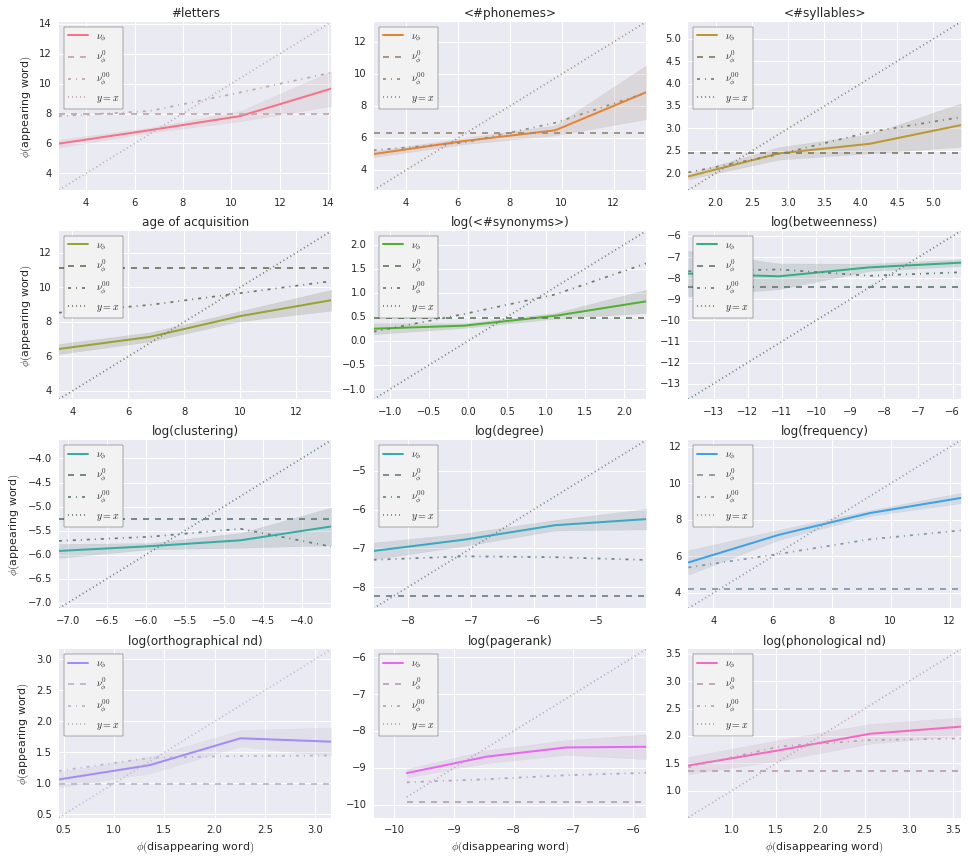

In [7]:
ordered_features = sorted(Substitution.__features__,
                          key=lambda f: Substitution._transformed_feature(f).__doc__)
g = sb.FacetGrid(data=variations, col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_variation, 'source', 'destination')
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$)$')
g.set_ylabels(r'$\phi($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_variations-absolute'),
                  bbox_inches='tight', dpi=300)

Now with sentence-relative features.

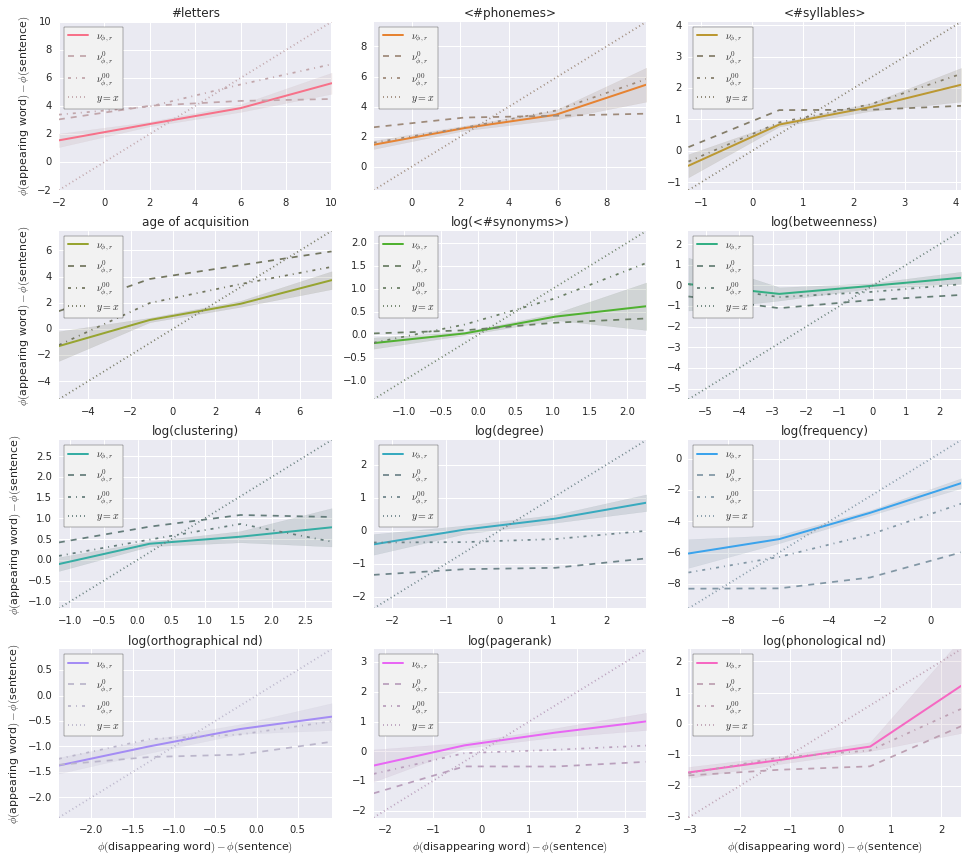

In [8]:
g = sb.FacetGrid(data=variations, col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_variation, 'source', 'destination', relative=True)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$) - \phi($sentence$)$')
g.set_ylabels(r'$\phi($appearing word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_variations-relative'),
                  bbox_inches='tight', dpi=300)

Then plot $\nu_{\phi} - \nu_{\phi}^{00}$ for each feature (i.e. the measured bias) to see how they compare

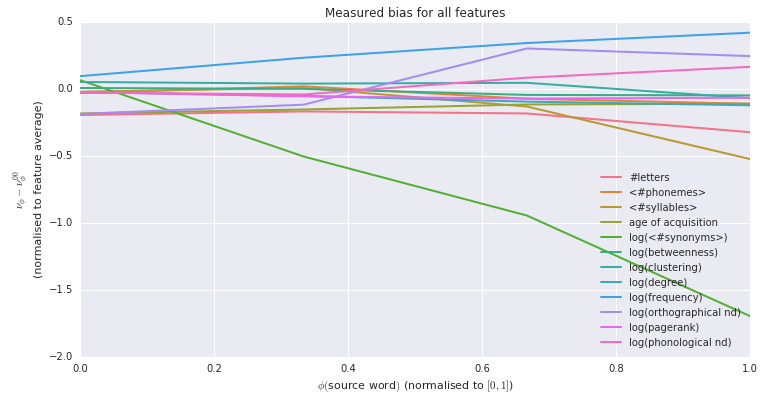

In [9]:
palette = sb.color_palette('husl', len(Substitution.__features__))
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(ordered_features):
    plot_bias(ax, variations[variations['feature'] == feature],
              color=palette[j], ci=False)
ax.legend(loc='lower right')
ax.set_title('Measured bias for all features')
ax.set_xlabel(r'$\phi($source word$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi} - \nu_{\phi}^{00}$' + '\n(normalised to feature average)')
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('all-feature_bias-absolute'),
                bbox_inches='tight', dpi=300)

Now with sentence-relative features.

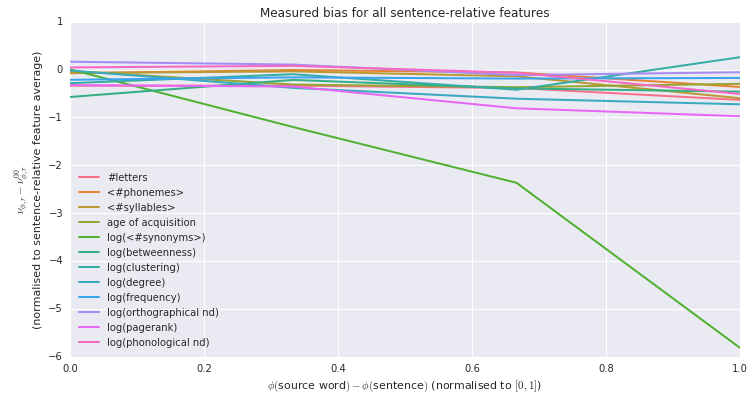

In [10]:
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(ordered_features):
    plot_bias(ax, variations[variations['feature'] == feature],
              color=palette[j], ci=False, relative=True)
ax.legend(loc='lower left')
ax.set_title('Measured bias for all sentence-relative features')
ax.set_xlabel(r'$\phi($source word$) - \phi($sentence$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$' +
              '\n(normalised to sentence-relative feature average)')
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('all-feature_bias-relative'),
                bbox_inches='tight', dpi=300)

### 2.3 Feature variations, reduced to features we expose in the paper

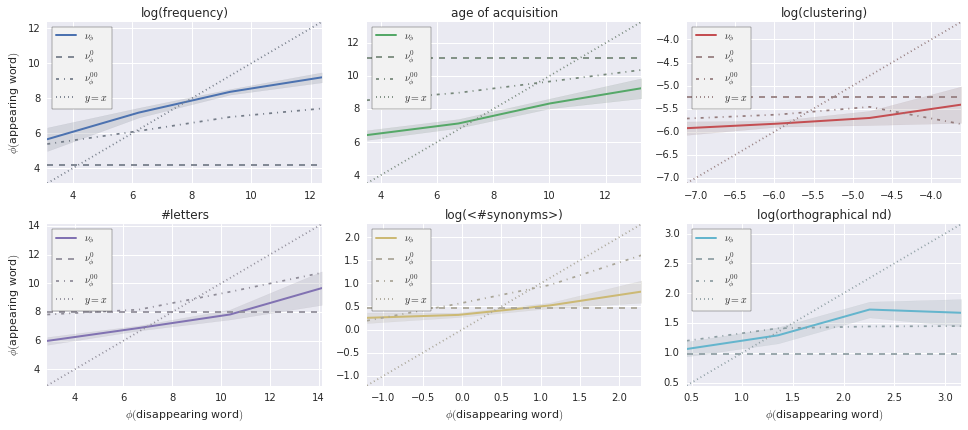

In [11]:
g = sb.FacetGrid(data=variations[variations['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_variation, 'source', 'destination')
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$)$')
g.set_ylabels(r'$\phi($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_variations-absolute'),
                  bbox_inches='tight', dpi=300)

Now with sentence-relative features.

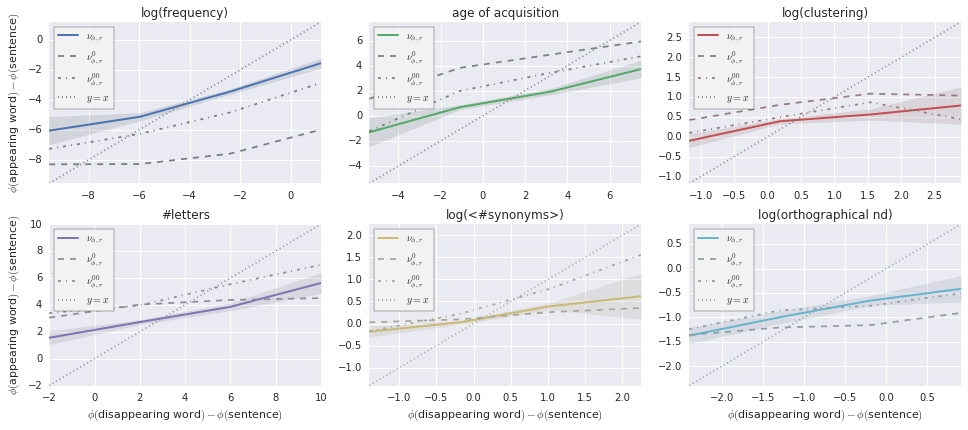

In [12]:
g = sb.FacetGrid(data=variations[variations['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_variation, 'source', 'destination', relative=True)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$) - \phi($sentence$)$')
g.set_ylabels(r'$\phi($appearing word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_variations-relative'),
                  bbox_inches='tight', dpi=300)

And the same with features relative to sentence average

Now $\nu_{\phi} - \nu_{\phi}^{00}$

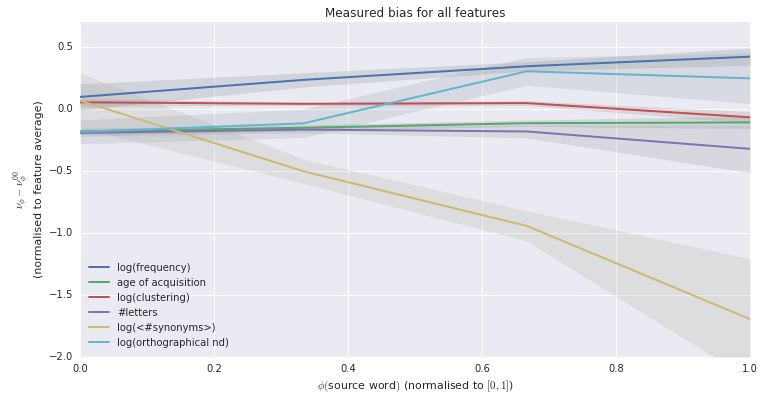

In [13]:
palette = sb.color_palette('deep', len(PAPER_FEATURES))
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(PAPER_FEATURES):
    plot_bias(ax, variations[variations['feature'] == feature],
              color=palette[j])
ax.legend(loc='lower left')
ax.set_title('Measured bias for all features')
ax.set_xlabel(r'$\phi($source word$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi} - \nu_{\phi}^{00}$' + '\n(normalised to feature average)')
ax.set_ylim(-2, .7)
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('paper-feature_bias-absolute'),
                bbox_inches='tight', dpi=300)

Now with sentence-relative features.

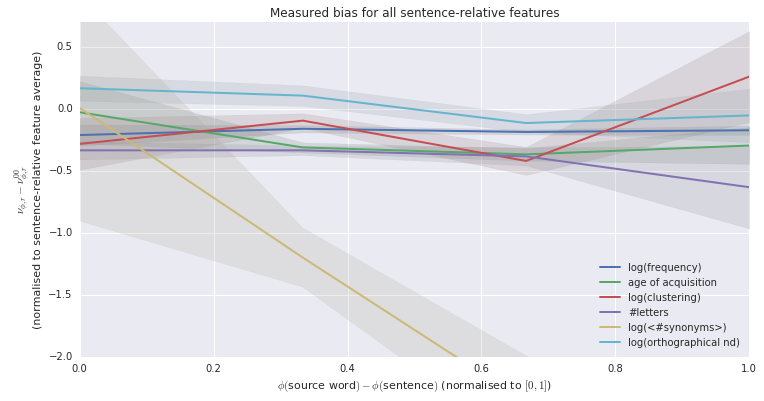

In [14]:
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(PAPER_FEATURES):
    plot_bias(ax, variations[variations['feature'] == feature],
              color=palette[j], relative=True)
ax.legend(loc='lower right')
ax.set_title('Measured bias for all sentence-relative features')
ax.set_xlabel(r'$\phi($source word$) - \phi($sentence$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$' +
              '\n(normalised to sentence-relative feature average)')
ax.set_ylim(-2, .7)
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('paper-feature_bias-relative'),
                bbox_inches='tight', dpi=300)

## 3 Streamplots

We'd like to see what happens between absolute and relative feature values, i.e. how do their effects interact. Especially, we want to know who wins between cognitive bias, attraction to sentence average, or attraction to global feature average.

To do this we plot the general direction (arrows) and strength (color) of where destination words are given a particular absolute/relative source feature couple. I.e., for a given absolute feature value and relative feature value, if this word were to be substituted, where would it go in this (absolute, relative) space?

The interesting thing in these plots is the attraction front, where all arrows point to and join. We're interested in:
* its slope
* its shape (e.g. several slope regimes?)
* its position w.r.t. $\nu_{\phi}^0$ and $y = 0$ (which is $\left< \phi(sentence) \right>$)

First, here's our plotting function. (Note we set the arrow size to something that turns out to be huge here, but gives normal sizes in the figures saves. There must be some dpi scaling problem with the arrows.)

In [15]:
def plot_stream(**kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    source = data['source']
    source_rel = data['source_rel']
    dest = data['destination']
    dest_rel = data['destination_rel']
    h0 = data['h0']
    
    # Compute binning.
    bin_count = 4
    x_bins, x_margins = pd.cut(source, bin_count, right=False, labels=False, retbins=True)
    x_middles = (x_margins[:-1] + x_margins[1:]) / 2
    y_bins, y_margins = pd.cut(source_rel, bin_count, right=False, labels=False, retbins=True)
    y_middles = (y_margins[:-1] + y_margins[1:]) / 2
    
    # Compute bin values.
    h0s = np.ones(bin_count) * h0.iloc[0]
    u_values = np.zeros((bin_count, bin_count))
    v_values = np.zeros((bin_count, bin_count))
    strength = np.zeros((bin_count, bin_count))
    for x in range(bin_count):
        for y in range(bin_count):
            u_values[y, x] = (dest[(x_bins == x) & (y_bins == y)] -
                              source[(x_bins == x) & (y_bins == y)]).mean()
            v_values[y, x] = (dest_rel[(x_bins == x) & (y_bins == y)] -
                              source_rel[(x_bins == x) & (y_bins == y)]).mean()
            strength[y, x] = np.sqrt((dest[(x_bins == x) & (y_bins == y)] - 
                                      source[(x_bins == x) & (y_bins == y)]) ** 2 +
                                     (dest_rel[(x_bins == x) & (y_bins == y)] - 
                                      source_rel[(x_bins == x) & (y_bins == y)]) ** 2).mean()
    
    # Plot.
    plt.streamplot(x_middles, y_middles, u_values, v_values,
                   arrowsize=4, color=strength, cmap=plt.cm.viridis)
    plt.plot(x_middles, np.zeros(bin_count), linestyle='-',
             color=sb.desaturate(color, 0.2), label=r'$\left< \phi(sentence) \right>$')
    plt.plot(h0s, y_middles, linestyle='--',
             color=sb.desaturate(color, 0.2), label=r'$\nu_{\phi}^0$')
    plt.xlim(x_middles[0], x_middles[-1])
    plt.ylim(y_middles[0], y_middles[-1])

Here are the plots for all features

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4089: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


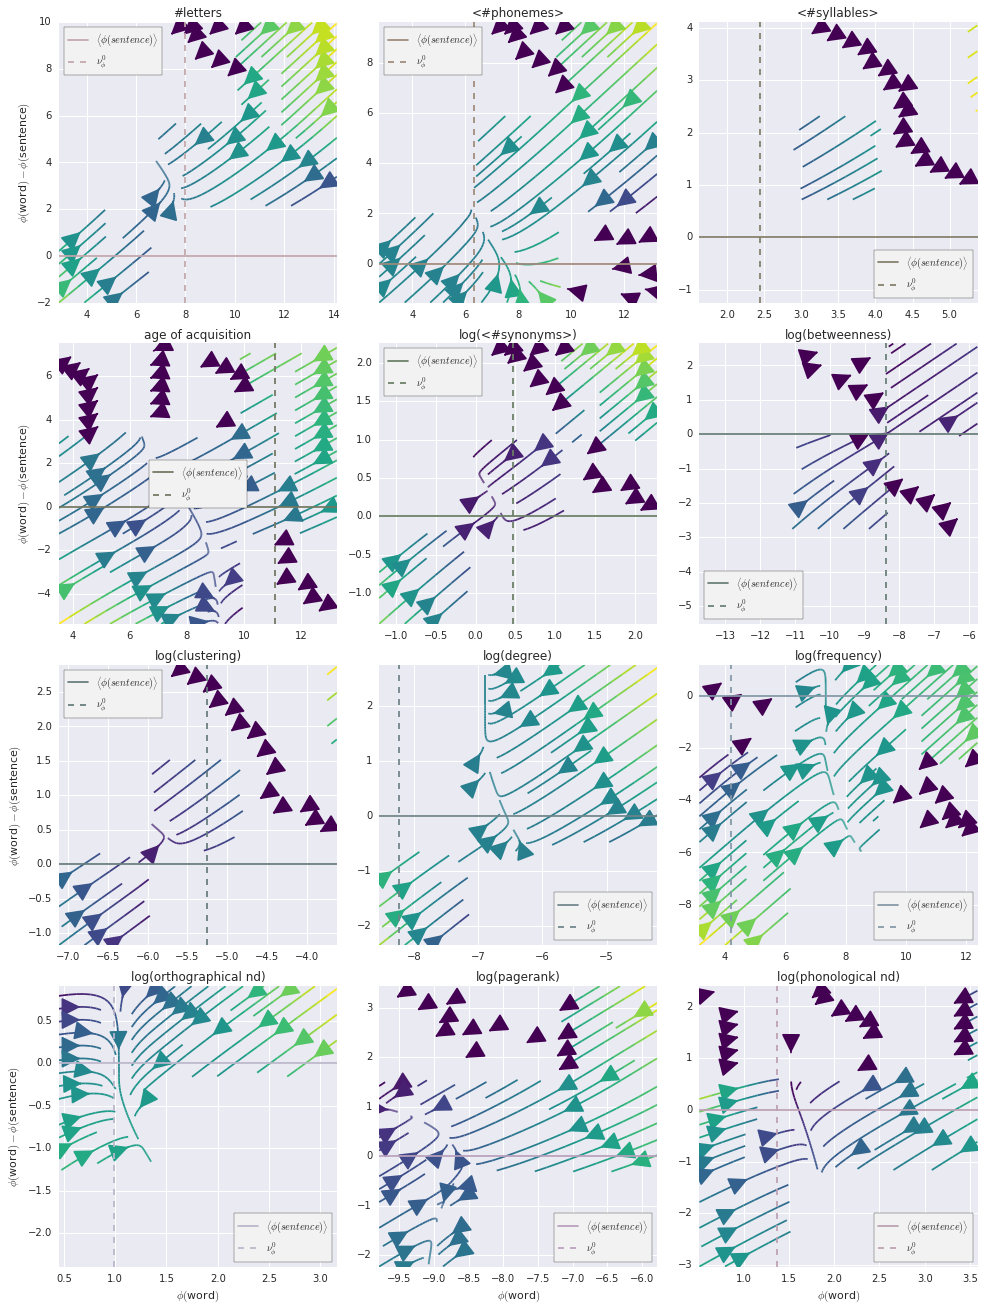

In [16]:
g = sb.FacetGrid(data=variations,
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_streams'),
                  bbox_inches='tight', dpi=300)

And here are the plots for the features we expose in the paper

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4089: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


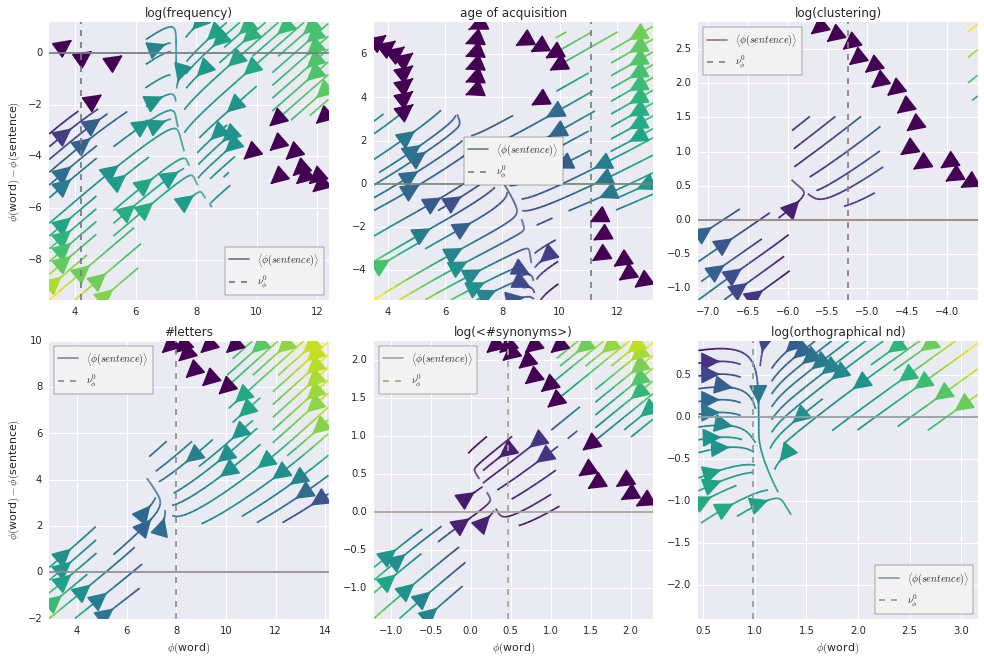

In [17]:
g = sb.FacetGrid(data=variations[variations['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_streams'),
                  bbox_inches='tight', dpi=300)

## 4 PCA'd feature variations

Compute PCA on feature *variations* (note: on variations, not on features directly), and show the evolution of the first three components upon substitution.

**CAVEAT**: the PCA is computed on variations where all features are defined. This greatly reduces the number of words included (and also the number of substitutions -- see below for real values, but you should know it's drastic). This also has an effect on the computation of $\mathcal{H}_0$ and $\mathcal{H}_{00}$, which are computed using words for which all features are defined. This, again, hugely reduces the number of words taken into account.

### 4.1 On all the features

Compute the actual PCA

In [18]:
# Compute the PCA.
pcafeatures = tuple(sorted(Substitution.__features__))
pcavariations = variations.pivot(index='cluster_id', columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

print("We're plotting variation for the first {} components:".format(N_COMPONENTS))
pd.DataFrame(pca.components_[:N_COMPONENTS],
             columns=pcafeatures,
             index=['Component-{}'.format(i) for i in range(N_COMPONENTS)])

MLE estimates there are 11 components.

Those explain the following variance:
[ 0.5072829   0.18364961  0.09281491  0.07368147  0.03424318  0.02961089
  0.02163169  0.01855127  0.01587964  0.01011151  0.00730902]

We're plotting variation for the first 3 components:


,aoa,betweenness,clustering,degree,frequency,letters_count,orthographical_density,pagerank,phonemes_count,phonological_density,syllables_count,synonyms_count
Component-0,-0.437199,0.313337,-0.089230,0.252240,0.232462,-0.423159,0.227672,0.296692,-0.395866,0.292080,-0.155227,-0.003196
Component-1,0.308386,-0.383678,0.124632,-0.283178,-0.279821,-0.432846,0.187896,-0.301898,-0.429717,0.245588,-0.157563,0.008205
Component-2,0.714301,0.174491,-0.119708,0.062844,0.645827,-0.105856,-0.032180,0.034352,-0.036065,0.064649,0.000597,-0.071090


Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [19]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(N_COMPONENTS):
            source, destination = substitution.components(component, pca, pcafeatures)
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'component': component,
                         'source': source,
                         'destination': destination,
                         'h0': substitution.component_average(component, pca, pcafeatures),
                         'h0n': substitution.component_average(component, pca, pcafeatures,
                                                               source_synonyms=True)})

original_component_variations = pd.DataFrame(data)
del data

  0% (    1 of 18511) |           | Elapsed Time: 0:00:44 ETA:  9 days, 14:13:32

  0% (  118 of 18511) |                    | Elapsed Time: 0:00:45 ETA:  0:01:52

  1% (  232 of 18511) |                    | Elapsed Time: 0:00:46 ETA:  0:02:05

  1% (  340 of 18511) |                    | Elapsed Time: 0:00:47 ETA:  0:02:04

  2% (  463 of 18511) |                    | Elapsed Time: 0:00:48 ETA:  0:01:58

  3% (  571 of 18511) |                    | Elapsed Time: 0:00:49 ETA:  0:01:58

  3% (  664 of 18511) |                    | Elapsed Time: 0:00:50 ETA:  0:02:01

  3% (  695 of 18511) |                    | Elapsed Time: 0:00:51 ETA:  0:02:02

  4% (  814 of 18511) |                    | Elapsed Time: 0:00:52 ETA:  0:02:01

  5% (  926 of 18511) |#                   | Elapsed Time: 0:00:53 ETA:  0:01:53

  5% ( 1057 of 18511) |#                   | Elapsed Time: 0:00:54 ETA:  0:01:48

  6% ( 1133 of 18511) |#                   | Elapsed Time: 0:00:55 ETA:  0:01:54

  6% ( 1157 of 18511) |#                   | Elapsed Time: 0:00:55 ETA:  0:02:01

  6% ( 1268 of 18511) |#                   | Elapsed Time: 0:00:56 ETA:  0:01:59

  7% ( 1389 of 18511) |#                   | Elapsed Time: 0:00:57 ETA:  0:01:56

  8% ( 1482 of 18511) |#                   | Elapsed Time: 0:00:58 ETA:  0:01:56

  8% ( 1620 of 18511) |#                   | Elapsed Time: 0:00:59 ETA:  0:01:58

  9% ( 1729 of 18511) |#                   | Elapsed Time: 0:01:00 ETA:  0:02:03

 10% ( 1852 of 18511) |##                  | Elapsed Time: 0:01:01 ETA:  0:01:46

 10% ( 1958 of 18511) |##                  | Elapsed Time: 0:01:02 ETA:  0:01:46

 11% ( 2083 of 18511) |##                  | Elapsed Time: 0:01:03 ETA:  0:01:41

 11% ( 2196 of 18511) |##                  | Elapsed Time: 0:01:04 ETA:  0:01:39

 12% ( 2314 of 18511) |##                  | Elapsed Time: 0:01:06 ETA:  0:01:39

 13% ( 2411 of 18511) |##                  | Elapsed Time: 0:01:07 ETA:  0:01:41

 13% ( 2546 of 18511) |##                  | Elapsed Time: 0:01:08 ETA:  0:01:40

 14% ( 2674 of 18511) |##                  | Elapsed Time: 0:01:09 ETA:  0:01:36

 15% ( 2777 of 18511) |###                 | Elapsed Time: 0:01:09 ETA:  0:01:29

 15% ( 2867 of 18511) |###                 | Elapsed Time: 0:01:10 ETA:  0:01:35

 16% ( 2981 of 18511) |###                 | Elapsed Time: 0:01:11 ETA:  0:01:34

 16% ( 3009 of 18511) |###                 | Elapsed Time: 0:01:12 ETA:  0:01:31

 16% ( 3122 of 18511) |###                 | Elapsed Time: 0:01:13 ETA:  0:01:29

 17% ( 3240 of 18511) |###                 | Elapsed Time: 0:01:14 ETA:  0:01:27

 18% ( 3354 of 18511) |###                 | Elapsed Time: 0:01:15 ETA:  0:01:25

 18% ( 3471 of 18511) |###                 | Elapsed Time: 0:01:16 ETA:  0:01:33

 19% ( 3585 of 18511) |###                 | Elapsed Time: 0:01:17 ETA:  0:01:27

 20% ( 3703 of 18511) |####                | Elapsed Time: 0:01:18 ETA:  0:01:28

 20% ( 3809 of 18511) |####                | Elapsed Time: 0:01:19 ETA:  0:01:29

 21% ( 3934 of 18511) |####                | Elapsed Time: 0:01:20 ETA:  0:01:26

 21% ( 4039 of 18511) |####                | Elapsed Time: 0:01:21 ETA:  0:01:28

 22% ( 4165 of 18511) |####                | Elapsed Time: 0:01:22 ETA:  0:01:27

 23% ( 4291 of 18511) |####                | Elapsed Time: 0:01:23 ETA:  0:01:23

 23% ( 4397 of 18511) |####                | Elapsed Time: 0:01:24 ETA:  0:01:22

 24% ( 4450 of 18511) |####                | Elapsed Time: 0:01:28 ETA:  0:02:54

 24% ( 4577 of 18511) |####                | Elapsed Time: 0:01:29 ETA:  0:02:50

 25% ( 4628 of 18511) |#####               | Elapsed Time: 0:01:30 ETA:  0:02:45

 25% ( 4742 of 18511) |#####               | Elapsed Time: 0:01:31 ETA:  0:02:41

 26% ( 4860 of 18511) |#####               | Elapsed Time: 0:01:32 ETA:  0:02:39

 26% ( 4983 of 18511) |#####               | Elapsed Time: 0:01:33 ETA:  0:02:39

 27% ( 5080 of 18511) |#####               | Elapsed Time: 0:01:34 ETA:  0:02:41

 27% ( 5091 of 18511) |#####               | Elapsed Time: 0:01:34 ETA:  0:02:43

 28% ( 5210 of 18511) |#####               | Elapsed Time: 0:01:35 ETA:  0:01:10

 28% ( 5322 of 18511) |#####               | Elapsed Time: 0:01:36 ETA:  0:01:13

 29% ( 5425 of 18511) |#####               | Elapsed Time: 0:01:37 ETA:  0:01:15

 30% ( 5554 of 18511) |######              | Elapsed Time: 0:01:38 ETA:  0:01:14

 30% ( 5660 of 18511) |######              | Elapsed Time: 0:01:39 ETA:  0:01:17

 31% ( 5785 of 18511) |######              | Elapsed Time: 0:01:40 ETA:  0:01:08

 31% ( 5910 of 18511) |######              | Elapsed Time: 0:01:41 ETA:  0:01:01

 32% ( 6017 of 18511) |######              | Elapsed Time: 0:01:42 ETA:  0:01:04

 33% ( 6137 of 18511) |######              | Elapsed Time: 0:01:43 ETA:  0:01:01

 33% ( 6248 of 18511) |######              | Elapsed Time: 0:01:44 ETA:  0:01:00

 34% ( 6364 of 18511) |######              | Elapsed Time: 0:01:45 ETA:  0:00:59

 35% ( 6479 of 18511) |#######             | Elapsed Time: 0:01:47 ETA:  0:01:02

 35% ( 6601 of 18511) |#######             | Elapsed Time: 0:01:48 ETA:  0:01:02

 36% ( 6711 of 18511) |#######             | Elapsed Time: 0:01:49 ETA:  0:00:58

 36% ( 6822 of 18511) |#######             | Elapsed Time: 0:01:50 ETA:  0:00:59

 37% ( 6942 of 18511) |#######             | Elapsed Time: 0:01:51 ETA:  0:00:55

 38% ( 7054 of 18511) |#######             | Elapsed Time: 0:01:52 ETA:  0:00:55

 38% ( 7174 of 18511) |#######             | Elapsed Time: 0:01:53 ETA:  0:00:52

 39% ( 7289 of 18511) |#######             | Elapsed Time: 0:01:54 ETA:  0:00:52

 40% ( 7405 of 18511) |########            | Elapsed Time: 0:01:55 ETA:  0:00:51

 40% ( 7518 of 18511) |########            | Elapsed Time: 0:01:56 ETA:  0:00:49

 41% ( 7636 of 18511) |########            | Elapsed Time: 0:01:57 ETA:  0:00:48

 41% ( 7759 of 18511) |########            | Elapsed Time: 0:01:58 ETA:  0:00:45

 42% ( 7847 of 18511) |########            | Elapsed Time: 0:01:59 ETA:  0:00:51

 42% ( 7868 of 18511) |########            | Elapsed Time: 0:01:59 ETA:  0:00:52

 43% ( 7987 of 18511) |########            | Elapsed Time: 0:02:00 ETA:  0:00:50

 43% ( 8099 of 18511) |########            | Elapsed Time: 0:02:01 ETA:  0:00:48

 44% ( 8215 of 18511) |########            | Elapsed Time: 0:02:02 ETA:  0:00:46

 45% ( 8330 of 18511) |#########           | Elapsed Time: 0:02:03 ETA:  0:00:43

 45% ( 8437 of 18511) |#########           | Elapsed Time: 0:02:04 ETA:  0:00:43

 46% ( 8562 of 18511) |#########           | Elapsed Time: 0:02:05 ETA:  0:00:45

 46% ( 8655 of 18511) |#########           | Elapsed Time: 0:02:06 ETA:  0:00:43

 47% ( 8760 of 18511) |#########           | Elapsed Time: 0:02:07 ETA:  0:00:40

 47% ( 8793 of 18511) |#########           | Elapsed Time: 0:02:08 ETA:  0:00:41

 48% ( 8911 of 18511) |#########           | Elapsed Time: 0:02:09 ETA:  0:00:39

 48% ( 9025 of 18511) |#########           | Elapsed Time: 0:02:10 ETA:  0:00:44

 49% ( 9141 of 18511) |#########           | Elapsed Time: 0:02:11 ETA:  0:00:41

 50% ( 9256 of 18511) |##########          | Elapsed Time: 0:02:12 ETA:  0:00:39

 50% ( 9362 of 18511) |##########          | Elapsed Time: 0:02:13 ETA:  0:00:35

 51% ( 9487 of 18511) |##########          | Elapsed Time: 0:02:14 ETA:  0:00:33

 51% ( 9595 of 18511) |##########          | Elapsed Time: 0:02:15 ETA:  0:00:35

 52% ( 9687 of 18511) |##########          | Elapsed Time: 0:02:16 ETA:  0:00:36

 52% ( 9719 of 18511) |##########          | Elapsed Time: 0:02:16 ETA:  0:00:35

 53% ( 9826 of 18511) |##########          | Elapsed Time: 0:02:17 ETA:  0:00:36

 53% ( 9950 of 18511) |##########          | Elapsed Time: 0:02:18 ETA:  0:00:35

 54% (10078 of 18511) |##########          | Elapsed Time: 0:02:19 ETA:  0:00:29

 54% (10155 of 18511) |##########          | Elapsed Time: 0:02:20 ETA:  0:00:37

 55% (10182 of 18511) |###########         | Elapsed Time: 0:02:21 ETA:  0:00:39

 55% (10263 of 18511) |###########         | Elapsed Time: 0:02:22 ETA:  0:00:45

 55% (10345 of 18511) |###########         | Elapsed Time: 0:02:23 ETA:  0:00:46

 56% (10413 of 18511) |###########         | Elapsed Time: 0:02:23 ETA:  0:00:48

 56% (10513 of 18511) |###########         | Elapsed Time: 0:02:24 ETA:  0:00:49

 57% (10617 of 18511) |###########         | Elapsed Time: 0:02:25 ETA:  0:00:49

 57% (10644 of 18511) |###########         | Elapsed Time: 0:02:26 ETA:  0:00:48

 58% (10779 of 18511) |###########         | Elapsed Time: 0:02:27 ETA:  0:00:45

 58% (10876 of 18511) |###########         | Elapsed Time: 0:02:28 ETA:  0:00:36

 59% (10964 of 18511) |###########         | Elapsed Time: 0:02:29 ETA:  0:00:36

 59% (11074 of 18511) |###########         | Elapsed Time: 0:02:30 ETA:  0:00:29

 60% (11107 of 18511) |############        | Elapsed Time: 0:02:30 ETA:  0:00:22

 60% (11196 of 18511) |############        | Elapsed Time: 0:02:31 ETA:  0:00:23

 61% (11338 of 18511) |############        | Elapsed Time: 0:02:32 ETA:  0:00:14

 61% (11464 of 18511) |############        | Elapsed Time: 0:02:33 ETA:  0:00:11

 62% (11549 of 18511) |############        | Elapsed Time: 0:02:34 ETA:  0:00:20

 62% (11570 of 18511) |############        | Elapsed Time: 0:02:34 ETA:  0:00:23

 63% (11664 of 18511) |############        | Elapsed Time: 0:02:35 ETA:  0:00:20

 63% (11801 of 18511) |############        | Elapsed Time: 0:02:36 ETA:  0:00:16

 64% (11916 of 18511) |############        | Elapsed Time: 0:02:37 ETA:  0:00:08

 65% (12033 of 18511) |#############       | Elapsed Time: 0:02:38 ETA:  0:00:10

 65% (12132 of 18511) |#############       | Elapsed Time: 0:02:39 ETA:  0:00:12

 66% (12264 of 18511) |#############       | Elapsed Time: 0:02:40 ETA:  0:00:07

 66% (12366 of 18511) |#############       | Elapsed Time: 0:02:41 ETA:  0:00:06

 67% (12495 of 18511) |#############       | Elapsed Time: 0:02:43 ETA:  0:00:04

 68% (12613 of 18511) |#############       | Elapsed Time: 0:02:44 ETA:  0:00:02

 68% (12696 of 18511) |#############       | Elapsed Time: 0:02:45 ETA:  0:00:08

 68% (12727 of 18511) |#############       | Elapsed Time: 0:02:45 ETA:  0:00:15

 69% (12844 of 18511) |#############       | Elapsed Time: 0:02:46 ETA:  0:00:09

 70% (12958 of 18511) |##############      | Elapsed Time: 0:02:47 ETA:  0:00:06

 70% (13088 of 18511) |##############      | Elapsed Time: 0:02:48 ETA:  0:00:00

 71% (13163 of 18511) |##############      | Elapsed Time: 0:02:49 ETA:  0:00:05

 71% (13190 of 18511) |##############      | Elapsed Time: 0:02:49 ETA:  0:00:07

 71% (13285 of 18511) |##############      | Elapsed Time: 0:02:50 ETA:  0:00:08

 72% (13378 of 18511) |##############      | Elapsed Time: 0:02:51 ETA:  0:00:13

 72% (13421 of 18511) |##############      | Elapsed Time: 0:02:52 ETA:  0:00:06

 72% (13513 of 18511) |##############      | Elapsed Time: 0:02:53 ETA:  0:00:04

 73% (13628 of 18511) |##############      | Elapsed Time: 0:02:54 ETA:  0:00:03

 73% (13652 of 18511) |##############      | Elapsed Time: 0:02:54 ETA:  0:00:08

 74% (13760 of 18511) |##############      | Elapsed Time: 0:02:55 ETA:  0:00:13

 75% (13884 of 18511) |###############     | Elapsed Time: 0:02:56 ETA:  0:00:02

 75% (13998 of 18511) |###############     | Elapsed Time: 0:02:57 ETA:  0:00:00

 76% (14115 of 18511) |###############     | Elapsed Time: 0:02:58 ETA:  0:00:00

 76% (14226 of 18511) |###############     | Elapsed Time: 0:02:59 ETA:  0:00:00

 77% (14347 of 18511) |###############     | Elapsed Time: 0:03:00 ETA:  0:00:00

 78% (14456 of 18511) |###############     | Elapsed Time: 0:03:01 ETA:  0:00:00

 78% (14578 of 18511) |###############     | Elapsed Time: 0:03:02 ETA:  0:00:00

 79% (14693 of 18511) |###############     | Elapsed Time: 0:03:03 ETA:  0:00:00

 80% (14809 of 18511) |################    | Elapsed Time: 0:03:04 ETA:  0:00:00

 80% (14914 of 18511) |################    | Elapsed Time: 0:03:05 ETA:  0:00:00

 81% (15041 of 18511) |################    | Elapsed Time: 0:03:06 ETA:  0:00:00

 81% (15164 of 18511) |################    | Elapsed Time: 0:03:07 ETA:  0:00:00

 82% (15249 of 18511) |################    | Elapsed Time: 0:03:08 ETA:  0:00:00

 82% (15272 of 18511) |################    | Elapsed Time: 0:03:09 ETA:  0:00:00

 82% (15346 of 18511) |################    | Elapsed Time: 0:03:10 ETA:  0:00:00

 83% (15433 of 18511) |################    | Elapsed Time: 0:03:11 ETA:  0:00:00

 83% (15503 of 18511) |################    | Elapsed Time: 0:03:11 ETA:  0:00:01

 84% (15612 of 18511) |################    | Elapsed Time: 0:03:12 ETA:  0:00:00

 84% (15669 of 18511) |################    | Elapsed Time: 0:03:13 ETA:  0:00:17

 85% (15735 of 18511) |#################   | Elapsed Time: 0:03:14 ETA:  0:00:14

 85% (15844 of 18511) |#################   | Elapsed Time: 0:03:15 ETA:  0:00:17

 86% (15966 of 18511) |#################   | Elapsed Time: 0:03:16 ETA:  0:00:05

 86% (16075 of 18511) |#################   | Elapsed Time: 0:03:17 ETA:  0:00:00

 87% (16198 of 18511) |#################   | Elapsed Time: 0:03:18 ETA:  0:00:00

 88% (16307 of 18511) |#################   | Elapsed Time: 0:03:19 ETA:  0:00:00

 88% (16429 of 18511) |#################   | Elapsed Time: 0:03:20 ETA:  0:00:00

 89% (16542 of 18511) |#################   | Elapsed Time: 0:03:21 ETA:  0:00:00

 89% (16631 of 18511) |#################   | Elapsed Time: 0:03:22 ETA:  0:00:00

 90% (16660 of 18511) |##################  | Elapsed Time: 0:03:22 ETA:  0:00:00

 90% (16783 of 18511) |##################  | Elapsed Time: 0:03:23 ETA:  0:00:00

 91% (16892 of 18511) |##################  | Elapsed Time: 0:03:24 ETA:  0:00:00

 91% (16998 of 18511) |##################  | Elapsed Time: 0:03:25 ETA:  0:00:00

 92% (17123 of 18511) |##################  | Elapsed Time: 0:03:27 ETA:  0:00:00

 93% (17231 of 18511) |##################  | Elapsed Time: 0:03:28 ETA:  0:00:00

 93% (17355 of 18511) |##################  | Elapsed Time: 0:03:29 ETA:  0:00:00

 94% (17461 of 18511) |##################  | Elapsed Time: 0:03:30 ETA:  0:00:00

 94% (17551 of 18511) |##################  | Elapsed Time: 0:03:31 ETA:  0:00:00

 95% (17586 of 18511) |################### | Elapsed Time: 0:03:31 ETA:  0:00:00

 95% (17690 of 18511) |################### | Elapsed Time: 0:03:32 ETA:  0:00:00

 96% (17778 of 18511) |################### | Elapsed Time: 0:03:33 ETA:  0:00:00

 96% (17817 of 18511) |################### | Elapsed Time: 0:03:33 ETA:  0:00:00

 96% (17922 of 18511) |################### | Elapsed Time: 0:03:35 ETA:  0:00:00

 97% (18024 of 18511) |################### | Elapsed Time: 0:03:36 ETA:  0:00:00

 97% (18049 of 18511) |################### | Elapsed Time: 0:03:36 ETA:  0:00:00

 97% (18135 of 18511) |################### | Elapsed Time: 0:03:37 ETA:  0:00:00

 98% (18243 of 18511) |################### | Elapsed Time: 0:03:38 ETA:  0:00:00

 98% (18280 of 18511) |################### | Elapsed Time: 0:03:38 ETA:  0:00:00

 99% (18415 of 18511) |################### | Elapsed Time: 0:03:39 ETA:  0:00:00

100% (18511 of 18511) |####################| Elapsed Time: 0:03:40 Time: 0:03:40


Compute cluster averages (so as not to overestimate confidence intervals).

In [20]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'component'], as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components (**see the caveat section below**)

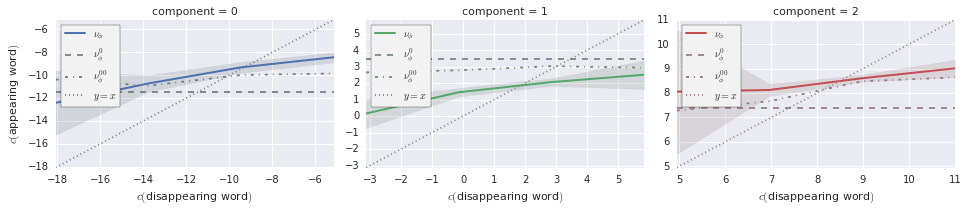

In [21]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation, 'source', 'destination')
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.2 On the features we expose in the paper

Compute the actual PCA

In [22]:
# Compute the PCA.
pcafeatures = tuple(sorted(PAPER_FEATURES))
pcavariations = variations[variations['feature'].map(lambda f: f in pcafeatures)]\
    .pivot(index='cluster_id', columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

print("We're plotting variation for the first {} components:".format(N_COMPONENTS))
pd.DataFrame(pca.components_[:N_COMPONENTS],
             columns=pcafeatures,
             index=['Component-{}'.format(i) for i in range(N_COMPONENTS)])

MLE estimates there are 4 components.

Those explain the following variance:
[ 0.52729824  0.19343489  0.16683808  0.04503762]

We're plotting variation for the first 3 components:


,aoa,clustering,frequency,letters_count,orthographical_density,synonyms_count
Component-0,-0.678454,-0.098557,0.348231,-0.565198,0.298755,0.004316
Component-1,0.526011,0.086043,-0.352897,-0.713904,0.284122,-0.031431
Component-2,-0.500766,0.117146,-0.850484,0.080020,0.043249,0.062554


Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [23]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(N_COMPONENTS):
            source, destination = substitution.components(component, pca, pcafeatures)
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'component': component,
                         'source': source,
                         'destination': destination,
                         'h0': substitution.component_average(component, pca, pcafeatures),
                         'h0n': substitution.component_average(component, pca, pcafeatures,
                                                               source_synonyms=True)})

original_component_variations = pd.DataFrame(data)
del data

  0% (    1 of 18511) |            | Elapsed Time: 0:00:14 ETA:  3 days, 1:45:25

  0% (  115 of 18511) |                    | Elapsed Time: 0:00:15 ETA:  0:02:27

  1% (  232 of 18511) |                    | Elapsed Time: 0:00:16 ETA:  0:02:28

  1% (  334 of 18511) |                    | Elapsed Time: 0:00:17 ETA:  0:02:33

  2% (  463 of 18511) |                    | Elapsed Time: 0:00:18 ETA:  0:02:22

  3% (  580 of 18511) |                    | Elapsed Time: 0:00:19 ETA:  0:02:21

  3% (  695 of 18511) |                    | Elapsed Time: 0:00:20 ETA:  0:02:19

  4% (  834 of 18511) |                    | Elapsed Time: 0:00:21 ETA:  0:02:13

  5% (  926 of 18511) |#                   | Elapsed Time: 0:00:22 ETA:  0:02:11

  5% ( 1068 of 18511) |#                   | Elapsed Time: 0:00:23 ETA:  0:02:05

  6% ( 1157 of 18511) |#                   | Elapsed Time: 0:00:24 ETA:  0:02:10

  6% ( 1271 of 18511) |#                   | Elapsed Time: 0:00:25 ETA:  0:02:07

  7% ( 1389 of 18511) |#                   | Elapsed Time: 0:00:26 ETA:  0:02:09

  8% ( 1503 of 18511) |#                   | Elapsed Time: 0:00:27 ETA:  0:02:08

  8% ( 1620 of 18511) |#                   | Elapsed Time: 0:00:28 ETA:  0:02:06

  9% ( 1751 of 18511) |#                   | Elapsed Time: 0:00:29 ETA:  0:02:06

 10% ( 1852 of 18511) |##                  | Elapsed Time: 0:00:29 ETA:  0:02:05

 10% ( 1977 of 18511) |##                  | Elapsed Time: 0:00:30 ETA:  0:02:07

 11% ( 2083 of 18511) |##                  | Elapsed Time: 0:00:31 ETA:  0:01:56

 11% ( 2218 of 18511) |##                  | Elapsed Time: 0:00:32 ETA:  0:01:53

 12% ( 2314 of 18511) |##                  | Elapsed Time: 0:00:33 ETA:  0:01:52

 13% ( 2421 of 18511) |##                  | Elapsed Time: 0:00:34 ETA:  0:01:53

 13% ( 2546 of 18511) |##                  | Elapsed Time: 0:00:35 ETA:  0:01:49

 14% ( 2700 of 18511) |##                  | Elapsed Time: 0:00:36 ETA:  0:01:45

 15% ( 2777 of 18511) |###                 | Elapsed Time: 0:00:36 ETA:  0:01:42

 15% ( 2901 of 18511) |###                 | Elapsed Time: 0:00:37 ETA:  0:01:43

 16% ( 3009 of 18511) |###                 | Elapsed Time: 0:00:38 ETA:  0:01:41

 16% ( 3130 of 18511) |###                 | Elapsed Time: 0:00:39 ETA:  0:01:43

 17% ( 3240 of 18511) |###                 | Elapsed Time: 0:00:40 ETA:  0:01:43

 18% ( 3367 of 18511) |###                 | Elapsed Time: 0:00:41 ETA:  0:01:40

 18% ( 3471 of 18511) |###                 | Elapsed Time: 0:00:42 ETA:  0:01:37

 19% ( 3597 of 18511) |###                 | Elapsed Time: 0:00:43 ETA:  0:01:38

 20% ( 3703 of 18511) |####                | Elapsed Time: 0:00:44 ETA:  0:01:43

 20% ( 3833 of 18511) |####                | Elapsed Time: 0:00:45 ETA:  0:01:44

 21% ( 3934 of 18511) |####                | Elapsed Time: 0:00:46 ETA:  0:01:42

 21% ( 4052 of 18511) |####                | Elapsed Time: 0:00:47 ETA:  0:01:42

 22% ( 4165 of 18511) |####                | Elapsed Time: 0:00:48 ETA:  0:01:42

 23% ( 4305 of 18511) |####                | Elapsed Time: 0:00:49 ETA:  0:01:39

 23% ( 4397 of 18511) |####                | Elapsed Time: 0:00:49 ETA:  0:01:38

 24% ( 4547 of 18511) |####                | Elapsed Time: 0:00:50 ETA:  0:01:33

 25% ( 4628 of 18511) |#####               | Elapsed Time: 0:00:51 ETA:  0:01:33

 25% ( 4767 of 18511) |#####               | Elapsed Time: 0:00:52 ETA:  0:01:28

 26% ( 4860 of 18511) |#####               | Elapsed Time: 0:00:53 ETA:  0:01:27

 27% ( 5001 of 18511) |#####               | Elapsed Time: 0:00:54 ETA:  0:01:26

 27% ( 5091 of 18511) |#####               | Elapsed Time: 0:00:54 ETA:  0:01:26

 28% ( 5227 of 18511) |#####               | Elapsed Time: 0:00:55 ETA:  0:01:22

 28% ( 5322 of 18511) |#####               | Elapsed Time: 0:00:56 ETA:  0:01:24

 29% ( 5438 of 18511) |#####               | Elapsed Time: 0:00:57 ETA:  0:01:25

 30% ( 5554 of 18511) |######              | Elapsed Time: 0:00:58 ETA:  0:01:27

 30% ( 5673 of 18511) |######              | Elapsed Time: 0:00:59 ETA:  0:01:27

 31% ( 5785 of 18511) |######              | Elapsed Time: 0:01:00 ETA:  0:01:27

 31% ( 5917 of 18511) |######              | Elapsed Time: 0:01:01 ETA:  0:01:26

 32% ( 6017 of 18511) |######              | Elapsed Time: 0:01:02 ETA:  0:01:29

 33% ( 6141 of 18511) |######              | Elapsed Time: 0:01:03 ETA:  0:01:26

 33% ( 6248 of 18511) |######              | Elapsed Time: 0:01:04 ETA:  0:01:29

 34% ( 6369 of 18511) |######              | Elapsed Time: 0:01:05 ETA:  0:01:28

 35% ( 6479 of 18511) |#######             | Elapsed Time: 0:01:06 ETA:  0:01:28

 35% ( 6612 of 18511) |#######             | Elapsed Time: 0:01:07 ETA:  0:01:25

 36% ( 6711 of 18511) |#######             | Elapsed Time: 0:01:08 ETA:  0:01:25

 36% ( 6842 of 18511) |#######             | Elapsed Time: 0:01:09 ETA:  0:01:24

 37% ( 6942 of 18511) |#######             | Elapsed Time: 0:01:10 ETA:  0:01:21

 38% ( 7057 of 18511) |#######             | Elapsed Time: 0:01:11 ETA:  0:01:22

 38% ( 7174 of 18511) |#######             | Elapsed Time: 0:01:11 ETA:  0:01:18

 39% ( 7303 of 18511) |#######             | Elapsed Time: 0:01:12 ETA:  0:01:16

 40% ( 7405 of 18511) |########            | Elapsed Time: 0:01:13 ETA:  0:01:15

 40% ( 7532 of 18511) |########            | Elapsed Time: 0:01:14 ETA:  0:01:12

 41% ( 7636 of 18511) |########            | Elapsed Time: 0:01:15 ETA:  0:01:13

 41% ( 7767 of 18511) |########            | Elapsed Time: 0:01:16 ETA:  0:01:11

 42% ( 7868 of 18511) |########            | Elapsed Time: 0:01:17 ETA:  0:01:15

 43% ( 7998 of 18511) |########            | Elapsed Time: 0:01:18 ETA:  0:01:13

 43% ( 8099 of 18511) |########            | Elapsed Time: 0:01:19 ETA:  0:01:11

 44% ( 8224 of 18511) |########            | Elapsed Time: 0:01:20 ETA:  0:01:10

 45% ( 8330 of 18511) |#########           | Elapsed Time: 0:01:21 ETA:  0:01:08

 45% ( 8456 of 18511) |#########           | Elapsed Time: 0:01:22 ETA:  0:01:07

 46% ( 8562 of 18511) |#########           | Elapsed Time: 0:01:23 ETA:  0:01:07

 46% ( 8671 of 18511) |#########           | Elapsed Time: 0:01:24 ETA:  0:01:07

 47% ( 8793 of 18511) |#########           | Elapsed Time: 0:01:25 ETA:  0:01:06

 48% ( 8927 of 18511) |#########           | Elapsed Time: 0:01:26 ETA:  0:01:04

 48% ( 9025 of 18511) |#########           | Elapsed Time: 0:01:27 ETA:  0:01:04

 49% ( 9155 of 18511) |#########           | Elapsed Time: 0:01:28 ETA:  0:01:02

 50% ( 9256 of 18511) |##########          | Elapsed Time: 0:01:28 ETA:  0:01:03

 50% ( 9378 of 18511) |##########          | Elapsed Time: 0:01:29 ETA:  0:01:03

 51% ( 9487 of 18511) |##########          | Elapsed Time: 0:01:30 ETA:  0:01:03

 51% ( 9618 of 18511) |##########          | Elapsed Time: 0:01:31 ETA:  0:00:59

 52% ( 9719 of 18511) |##########          | Elapsed Time: 0:01:32 ETA:  0:00:54

 53% ( 9840 of 18511) |##########          | Elapsed Time: 0:01:33 ETA:  0:00:54

 53% ( 9950 of 18511) |##########          | Elapsed Time: 0:01:34 ETA:  0:00:55

 54% (10085 of 18511) |##########          | Elapsed Time: 0:01:35 ETA:  0:00:52

 55% (10182 of 18511) |###########         | Elapsed Time: 0:01:36 ETA:  0:00:57

 55% (10274 of 18511) |###########         | Elapsed Time: 0:01:37 ETA:  0:01:02

 55% (10365 of 18511) |###########         | Elapsed Time: 0:01:38 ETA:  0:01:04

 56% (10413 of 18511) |###########         | Elapsed Time: 0:01:39 ETA:  0:01:08

 56% (10524 of 18511) |###########         | Elapsed Time: 0:01:40 ETA:  0:01:11

 57% (10644 of 18511) |###########         | Elapsed Time: 0:01:41 ETA:  0:01:14

 58% (10775 of 18511) |###########         | Elapsed Time: 0:01:42 ETA:  0:01:14

 58% (10876 of 18511) |###########         | Elapsed Time: 0:01:43 ETA:  0:01:07

 59% (10976 of 18511) |###########         | Elapsed Time: 0:01:44 ETA:  0:01:08

 60% (11107 of 18511) |############        | Elapsed Time: 0:01:45 ETA:  0:00:56

 60% (11206 of 18511) |############        | Elapsed Time: 0:01:46 ETA:  0:00:58

 61% (11338 of 18511) |############        | Elapsed Time: 0:01:47 ETA:  0:00:53

 61% (11446 of 18511) |############        | Elapsed Time: 0:01:48 ETA:  0:00:54

 62% (11533 of 18511) |############        | Elapsed Time: 0:01:49 ETA:  0:01:02

 62% (11570 of 18511) |############        | Elapsed Time: 0:01:49 ETA:  0:01:08

 63% (11667 of 18511) |############        | Elapsed Time: 0:01:50 ETA:  0:01:08

 63% (11801 of 18511) |############        | Elapsed Time: 0:01:51 ETA:  0:01:08

 64% (11911 of 18511) |############        | Elapsed Time: 0:01:52 ETA:  0:01:04

 65% (12033 of 18511) |#############       | Elapsed Time: 0:01:53 ETA:  0:01:05

 65% (12140 of 18511) |#############       | Elapsed Time: 0:01:54 ETA:  0:01:04

 66% (12264 of 18511) |#############       | Elapsed Time: 0:01:55 ETA:  0:00:54

 66% (12372 of 18511) |#############       | Elapsed Time: 0:01:56 ETA:  0:00:50

 67% (12495 of 18511) |#############       | Elapsed Time: 0:01:57 ETA:  0:00:43

 68% (12628 of 18511) |#############       | Elapsed Time: 0:01:58 ETA:  0:00:38

 68% (12716 of 18511) |#############       | Elapsed Time: 0:01:59 ETA:  0:00:42

 68% (12727 of 18511) |#############       | Elapsed Time: 0:02:00 ETA:  0:00:44

 69% (12850 of 18511) |#############       | Elapsed Time: 0:02:01 ETA:  0:00:41

 70% (12958 of 18511) |##############      | Elapsed Time: 0:02:01 ETA:  0:00:37

 70% (13092 of 18511) |##############      | Elapsed Time: 0:02:02 ETA:  0:00:31

 71% (13190 of 18511) |##############      | Elapsed Time: 0:02:03 ETA:  0:00:34

 71% (13300 of 18511) |##############      | Elapsed Time: 0:02:04 ETA:  0:00:36

 72% (13421 of 18511) |##############      | Elapsed Time: 0:02:06 ETA:  0:00:33

 73% (13544 of 18511) |##############      | Elapsed Time: 0:02:07 ETA:  0:00:28

 73% (13652 of 18511) |##############      | Elapsed Time: 0:02:07 ETA:  0:00:24

 74% (13774 of 18511) |##############      | Elapsed Time: 0:02:08 ETA:  0:00:26

 75% (13884 of 18511) |###############     | Elapsed Time: 0:02:09 ETA:  0:00:27

 75% (14021 of 18511) |###############     | Elapsed Time: 0:02:10 ETA:  0:00:18

 76% (14115 of 18511) |###############     | Elapsed Time: 0:02:11 ETA:  0:00:17

 76% (14242 of 18511) |###############     | Elapsed Time: 0:02:12 ETA:  0:00:13

 77% (14347 of 18511) |###############     | Elapsed Time: 0:02:13 ETA:  0:00:10

 78% (14466 of 18511) |###############     | Elapsed Time: 0:02:14 ETA:  0:00:10

 78% (14578 of 18511) |###############     | Elapsed Time: 0:02:15 ETA:  0:00:08

 79% (14698 of 18511) |###############     | Elapsed Time: 0:02:16 ETA:  0:00:10

 80% (14809 of 18511) |################    | Elapsed Time: 0:02:16 ETA:  0:00:09

 80% (14930 of 18511) |################    | Elapsed Time: 0:02:17 ETA:  0:00:08

 81% (15041 of 18511) |################    | Elapsed Time: 0:02:18 ETA:  0:00:08

 81% (15173 of 18511) |################    | Elapsed Time: 0:02:19 ETA:  0:00:07

 82% (15272 of 18511) |################    | Elapsed Time: 0:02:20 ETA:  0:00:12

 83% (15374 of 18511) |################    | Elapsed Time: 0:02:21 ETA:  0:00:14

 83% (15503 of 18511) |################    | Elapsed Time: 0:02:23 ETA:  0:00:16

 84% (15625 of 18511) |################    | Elapsed Time: 0:02:24 ETA:  0:00:16

 84% (15706 of 18511) |################    | Elapsed Time: 0:02:25 ETA:  0:00:23

 85% (15735 of 18511) |#################   | Elapsed Time: 0:02:25 ETA:  0:00:26

 85% (15855 of 18511) |#################   | Elapsed Time: 0:02:26 ETA:  0:00:28

 86% (15966 of 18511) |#################   | Elapsed Time: 0:02:27 ETA:  0:00:20

 86% (16091 of 18511) |#################   | Elapsed Time: 0:02:28 ETA:  0:00:16

 87% (16198 of 18511) |#################   | Elapsed Time: 0:02:28 ETA:  0:00:09

 88% (16319 of 18511) |#################   | Elapsed Time: 0:02:29 ETA:  0:00:06

 88% (16429 of 18511) |#################   | Elapsed Time: 0:02:30 ETA:  0:00:05

 89% (16552 of 18511) |#################   | Elapsed Time: 0:02:31 ETA:  0:00:04

 90% (16660 of 18511) |##################  | Elapsed Time: 0:02:32 ETA:  0:00:00

 90% (16794 of 18511) |##################  | Elapsed Time: 0:02:33 ETA:  0:00:00

 91% (16892 of 18511) |##################  | Elapsed Time: 0:02:34 ETA:  0:00:00

 91% (17014 of 18511) |##################  | Elapsed Time: 0:02:35 ETA:  0:00:00

 92% (17123 of 18511) |##################  | Elapsed Time: 0:02:36 ETA:  0:00:00

 93% (17234 of 18511) |##################  | Elapsed Time: 0:02:37 ETA:  0:00:00

 93% (17355 of 18511) |##################  | Elapsed Time: 0:02:38 ETA:  0:00:00

 94% (17470 of 18511) |##################  | Elapsed Time: 0:02:39 ETA:  0:00:00

 95% (17586 of 18511) |################### | Elapsed Time: 0:02:40 ETA:  0:00:00

 95% (17711 of 18511) |################### | Elapsed Time: 0:02:41 ETA:  0:00:00

 96% (17817 of 18511) |################### | Elapsed Time: 0:02:42 ETA:  0:00:00

 96% (17931 of 18511) |################### | Elapsed Time: 0:02:43 ETA:  0:00:00

 97% (18049 of 18511) |################### | Elapsed Time: 0:02:44 ETA:  0:00:00

 98% (18151 of 18511) |################### | Elapsed Time: 0:02:45 ETA:  0:00:00

 98% (18280 of 18511) |################### | Elapsed Time: 0:02:46 ETA:  0:00:00

 99% (18400 of 18511) |################### | Elapsed Time: 0:02:47 ETA:  0:00:00

100% (18511 of 18511) |####################| Elapsed Time: 0:02:48 Time: 0:02:48


Compute cluster averages (so as not to overestimate confidence intervals).

In [24]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'component'], as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components

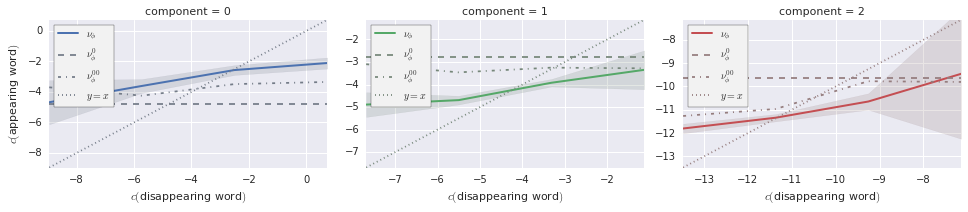

In [25]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation, 'source', 'destination')
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.3 CAVEAT: reduction of the numbers of words and substitutions

As explained above, this PCA analysis can only use words for which *all* the features are defined (in this case, the features listed in `PAPER_FEATURES`). So note the following:

In [26]:
for feature in PAPER_FEATURES:
    print("Feature '{}' is based on {} words."
          .format(feature, len(Substitution._transformed_feature(feature)())))

# Compute the number of words that have all PAPER_FEATURES defined.
words = set()
for tfeature in [Substitution._transformed_feature(feature) for feature in PAPER_FEATURES]:
    words.update(tfeature())

data = dict((feature, []) for feature in PAPER_FEATURES)
words_list = []
for word in words:
    words_list.append(word)
    for feature in PAPER_FEATURES:
        data[feature].append(Substitution._transformed_feature(feature)(word))
wordsdf = pd.DataFrame(data)
wordsdf['words'] = words_list
del words_list, data

print()
print("Among all the set of words used by these features, only {} are used."
      .format(len(wordsdf.dropna())))

print()
print("Similarly, we mined {} (cluster-unique) substitutions, but the PCA is in fact"
      " computed on {} of them (those where all features are defined)."
      .format(len(set(variations['cluster_id'])), len(pcavariations)))

Feature 'frequency' is based on 33450 words.
Feature 'aoa' is based on 30102 words.
Feature 'clustering' is based on 5739 words.
Feature 'letters_count' is based on 42786 words.
Feature 'synonyms_count' is based on 147306 words.
Feature 'orthographical_density' is based on 27751 words.



Among all the set of words used by these features, only 3322 are used.

Similarly, we mined 1746 (cluster-unique) substitutions, but the PCA is in fact computed on 551 of them (those where all features are defined).


The way $\mathcal{H}_0$ and $\mathcal{H}_{00}$ are computed makes them also affected by this.